In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [45]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the data')

There are 13320 rows and 9 columns in the data


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [47]:
round(df.describe(),2) # some statistical description about the data

,bath,balcony,price
count,13247.00,12711.00,13320.00
mean,2.69,1.58,112.57
std,1.34,0.82,148.97
min,1.00,0.00,8.00
25%,2.00,1.00,50.00
50%,2.00,2.00,72.00
75%,3.00,2.00,120.00
max,40.00,3.00,3600.00


now let's check the number of missing values

Text(0.5, 1.0, 'Graph showsing missing values')

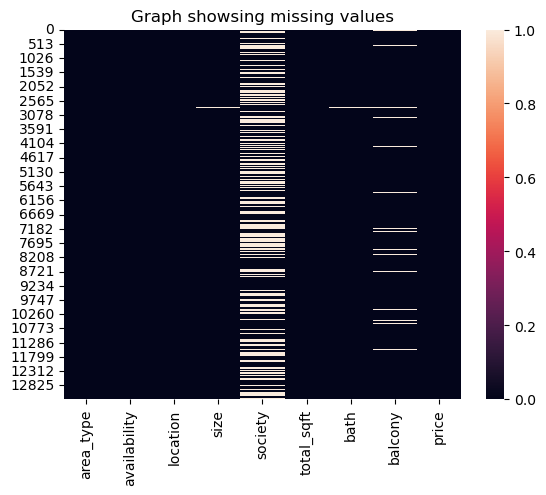

In [48]:
sns.heatmap(df.isnull(),annot=False)
plt.title("Graph showsing missing values")

# Data cleaning

In [49]:
pd.DataFrame(df.isnull().sum(),columns=["No of missing values"])

,No of missing values
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


since the number of missing values represent a very small percentage , we can hereby remove them

In [50]:
df.drop("society",inplace=True,axis=1)
#dropping the society column because there is too many NAN values and that 
#dropping those NAN values will signifcantly reduce our data which is very unprofessional as a data scientist

Text(0.5, 1.0, 'Bathroom distribution')

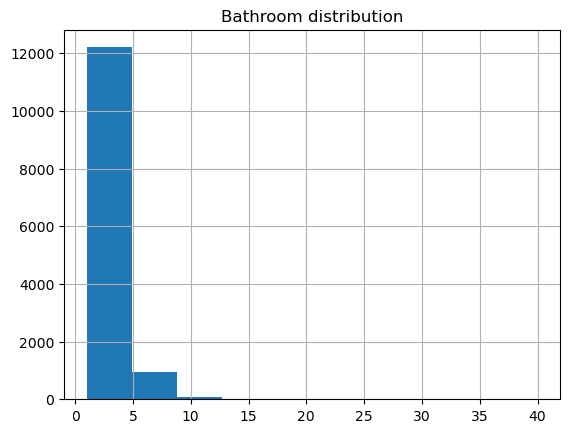

In [51]:
df["bath"].hist()
plt.title("Bathroom distribution")

<Axes: >

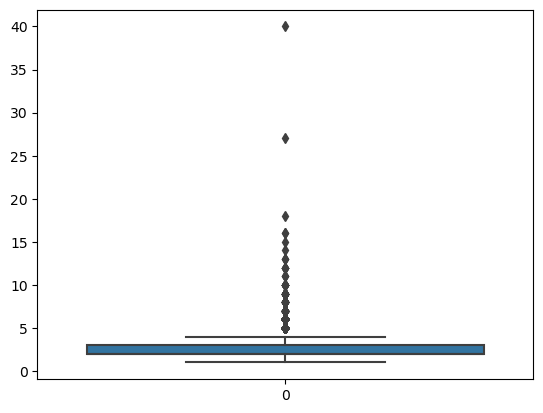

In [52]:
sns.boxplot(df["bath"])

since it's skewed right, I'll fill the NAN values in the bath column with its median

normally in skewed right graph , the median is mostly larger than the mean , but it's not true here,

this is because of the presence of extreme outliers as seen in the boxplot




In [53]:
df["bath"].fillna(df["bath"].median(),inplace=True)

Text(0.5, 1.0, 'Balcony distribution')

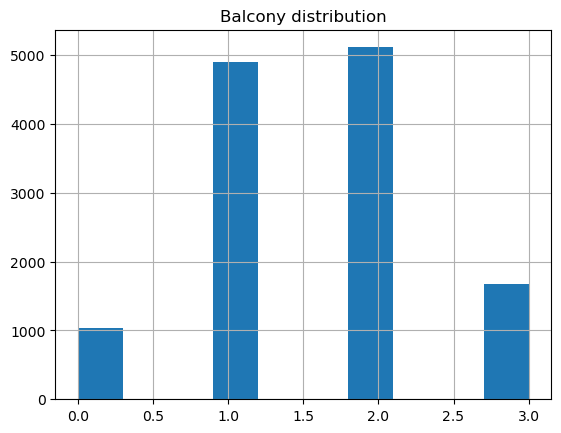

In [54]:
df["balcony"].hist()
plt.title("Balcony distribution")

<Axes: >

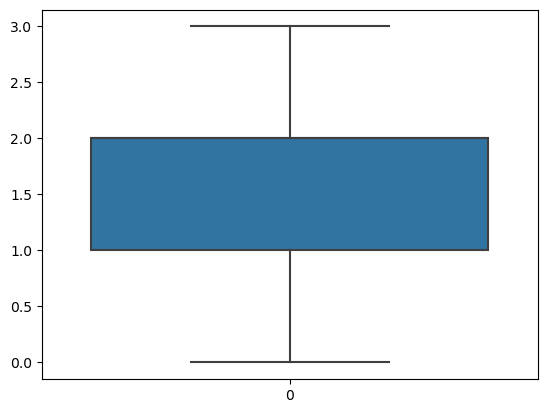

In [55]:
sns.boxplot(df["balcony"])

I'll fill the NAN values in the balcony column with its mean

In [56]:
df["balcony"].fillna(df["balcony"].median(),inplace=True)

In [57]:
df.dropna(inplace=True)

In [58]:
len(df[df.duplicated()])

569

In [59]:
df.drop_duplicates(inplace=True)# let's drop all duplicated rows and columns

In [60]:
df["total_sqft"].value_counts()


total_sqft
1200           803
1100           209
1500           201
2400           195
600            178
              ... 
2005             1
605 - 624        1
4260 - 4408      1
2582             1
4689             1
Name: count, Length: 2110, dtype: int64

also from the size column , lets's create a new column called

other property which tells us whether our
particular data has kitchen and hall or doesn't

4BHK means 4 bedroom , a kitchen and hall
so let's create a new column called kitchen_and_hall ,

that tells us the number of kitchen and hall in the house

From the above code, we can tell that the total_sqft column is filled with different unit of meaurement ,such as Acre, meter,
feet,yard and even ranges of values
let's address this issue by converting all to a standard/ one unit , that's sq feet

In [61]:
df["size"]=df["size"].replace("1 RK","1 BHK ")
df["size"].value_counts()

size
2 BHK         4903
3 BHK         4107
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 BHK           13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [62]:
def kitchen_and_hall(column):# This function creates a new column indicaing that there is kithen and hall in the house or not
    if "BHK" in column:
        return "has kitchen and hall"
    else:
        return "no kitchen and hall"

df["other_property"] = df["size"].apply(kitchen_and_hall)


In [63]:
def kitchen_and_hall2(column):# this function also takes the presence of HK in the size column as two rooms( 1 kitchen , 1 hall)
    if "BHK" in column:
        return 2
    else:
        return 0

df["kitchen_and_hall"] = df["size"].apply(kitchen_and_hall2)


In [64]:
def total_sqft(column):# this function converts all the units of measurement of land to a standard/common unit , that's sq feet
    # it also addresses the range ,which computes their mean
    try:
        if "-" in column:
            ax=column.split("-")
            mean=(float(ax[0])+float(ax[1]))//2
            return mean
        elif 'Sq. Meter' in column:
            ax=column.split("Sq")
            return float(ax[0])*10.764 # converting to sq feet 
        elif 'Sq. Yards' in column:
            ax=column.split("Sq")
            return float(ax[0])*9 # converting to sq feet 
        elif 'Acres' in column:
            ax=column.split("A")
            return float(ax[0])*43560 # converting to sq feet
        elif "Perch" in column:
            ax=column.split("P")
            return float(ax[0])*272.25 # converting to sq feet
        elif "Cents" in column:
            ax=column.split("C")
            return float(ax[0])*435.6 # converting to sq feet
        elif "Guntha" in column:
            ax=column.split("G")
            return float(ax[0])*1089 # converting to sq feet
        elif "Grounds" in column:
            ax=column.split("Gr")
            return float(ax[0])*2400
        else:
            return float(column)
    except:
        return float(column)
df["total_sqft"]=df["total_sqft"].apply(total_sqft)
df["total_sqft"]=df["total_sqft"].apply(lambda x: float(x))

In [65]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,other_property,kitchen_and_hall
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,has kitchen and hall,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,no kitchen and hall,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,has kitchen and hall,2
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,has kitchen and hall,2
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,has kitchen and hall,2


In [66]:
df["other_property"].value_counts()

other_property
has kitchen and hall    10246
no kitchen and hall      2488
Name: count, dtype: int64

now we haave to create a new column called total_rooms which

will be the addition of bathroom, bedroom and kitchen&hall

In [67]:
df["bedroom"]=df["size"].apply(lambda x:x.split(" ")[0])
df["bedroom"]=df["bedroom"].apply(lambda x: int(x))
df["bath"]=df["bath"].apply(lambda x: int(x))
df["balcony"]=df["balcony"].apply(lambda x: int(x))
df["total_rooms"]=df["bath"]+df["bedroom"]+df["kitchen_and_hall"]

In [68]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,other_property,kitchen_and_hall,bedroom,total_rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2,1,39.07,has kitchen and hall,2,2,6
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,no kitchen and hall,0,4,9
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2,3,62.00,has kitchen and hall,2,3,7
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,has kitchen and hall,2,3,8
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2,1,51.00,has kitchen and hall,2,2,6


# Let's visualize

# AREA TYPE

In [69]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8278
Built-up  Area          2396
Plot  Area              1973
Carpet  Area              87
Name: count, dtype: int64

Text(0.5, 1.0, 'Area Type')

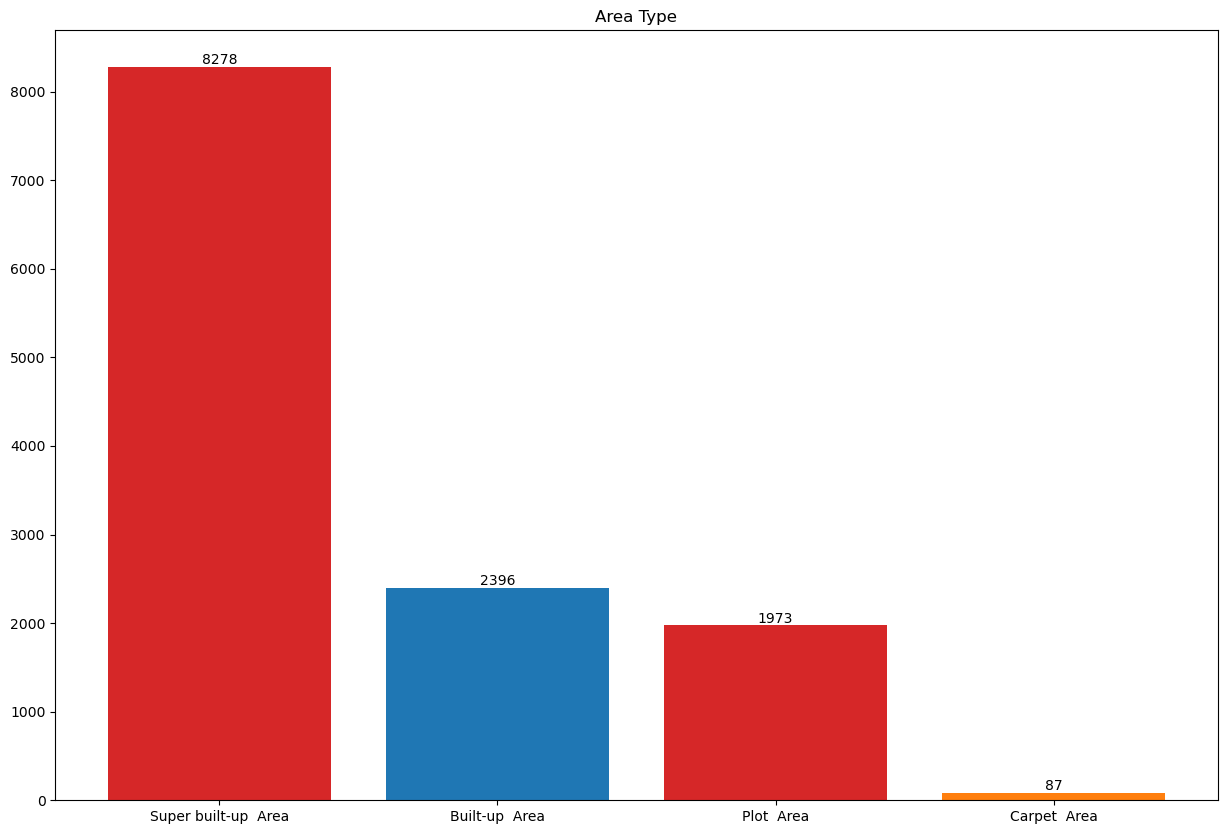

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))
branch = list(df["area_type"].value_counts().index)
values = list(df["area_type"].value_counts().values)
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
ax.bar(branch,values,label=bar_labels,color=bar_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title("Area Type")

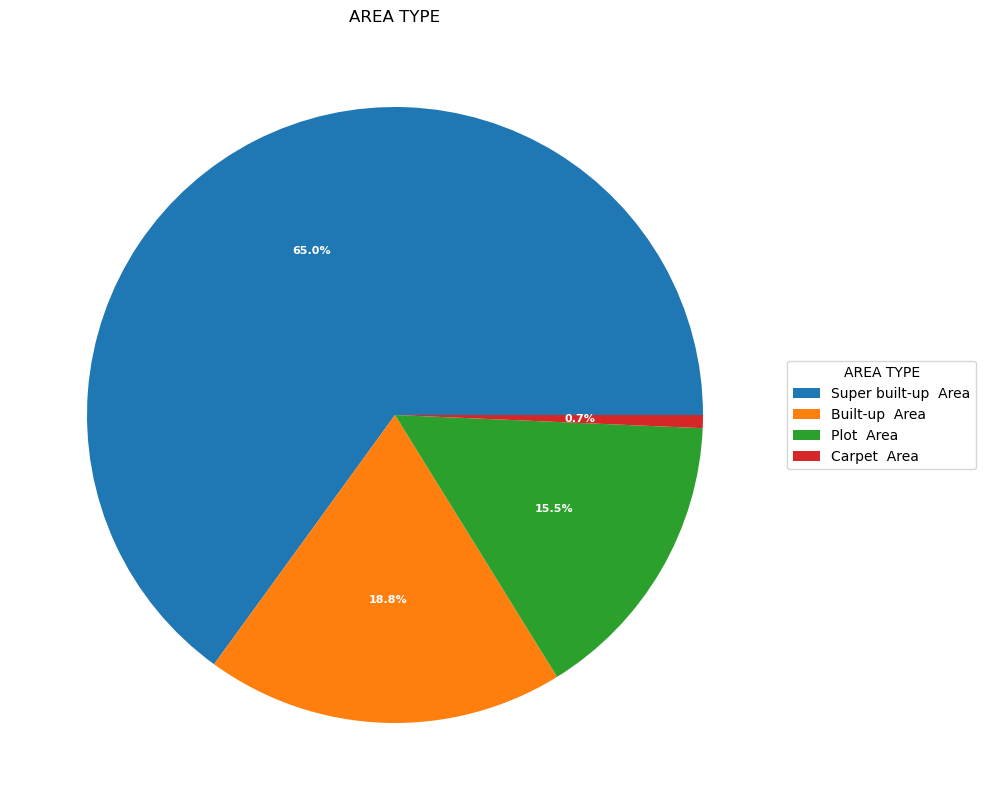

In [71]:


fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

values= list(df["area_type"].value_counts().values)
branches= list(df["area_type"].value_counts().index)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                  textprops=dict(color="w"))
ax.legend(wedges, branches,
          title="AREA TYPE",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("AREA TYPE")

plt.show()

Text(0.5, 1.0, 'AREA TYPE VS PRICE')

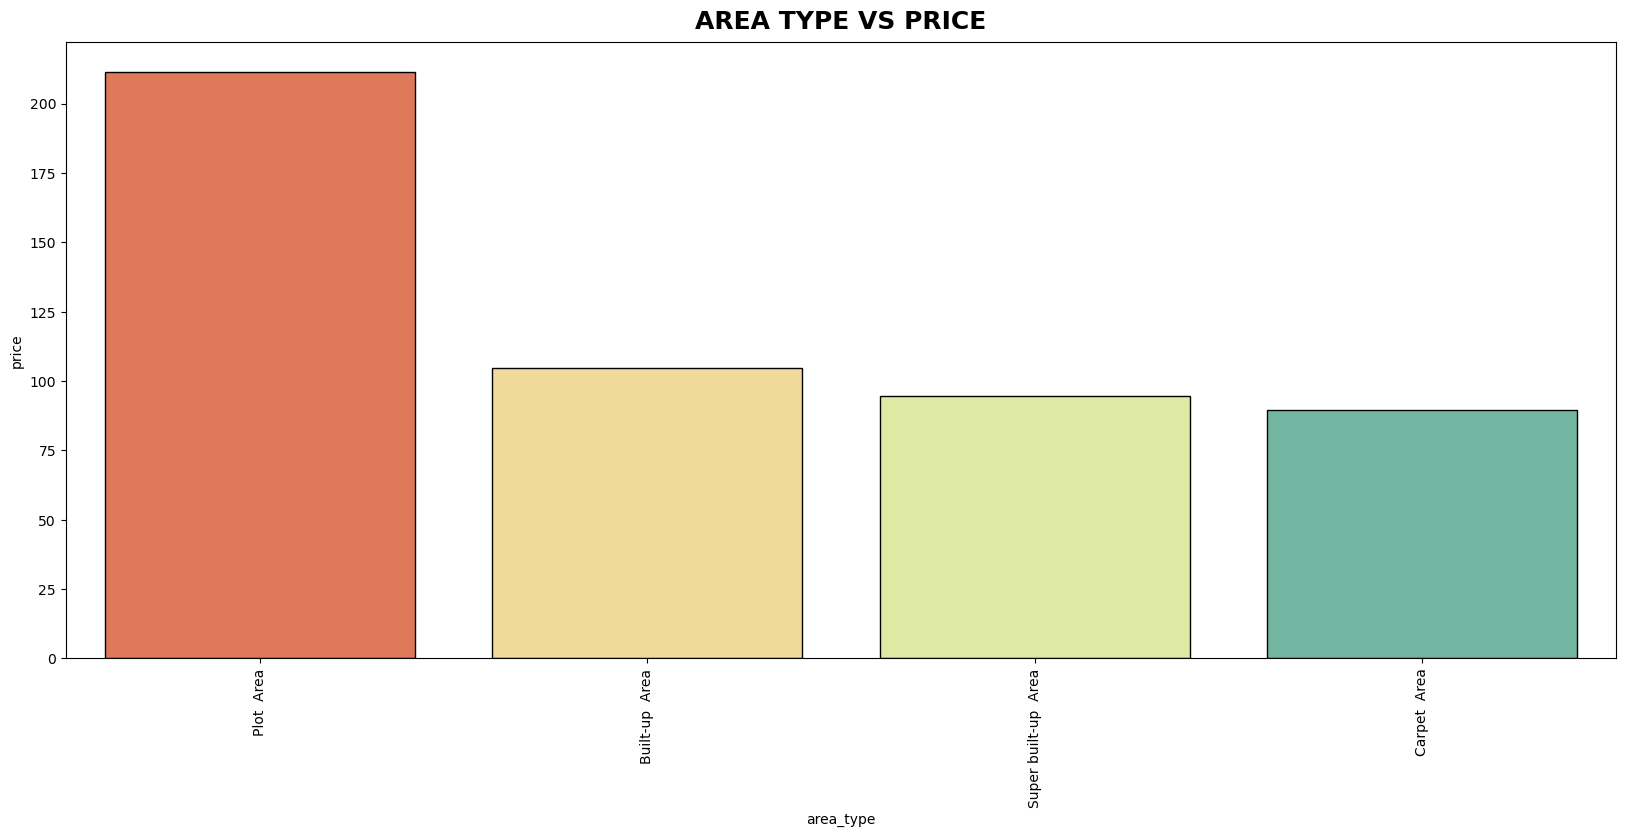

In [72]:
plt.figure(figsize=(20,8))
df["area_type"].value_counts()
cols_list = df.groupby(df["area_type"])["price"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["area_type"], y = 'price', data = df[df["area_type"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 90);
#ax.bar_label(ax.containers[0])
plt.title(f'AREA TYPE VS PRICE',pad=10,fontweight="black",fontsize=18)
    

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Super built-up  Area'),
  Text(1, 0, 'Plot  Area'),
  Text(2, 0, 'Built-up  Area'),
  Text(3, 0, 'Carpet  Area')])

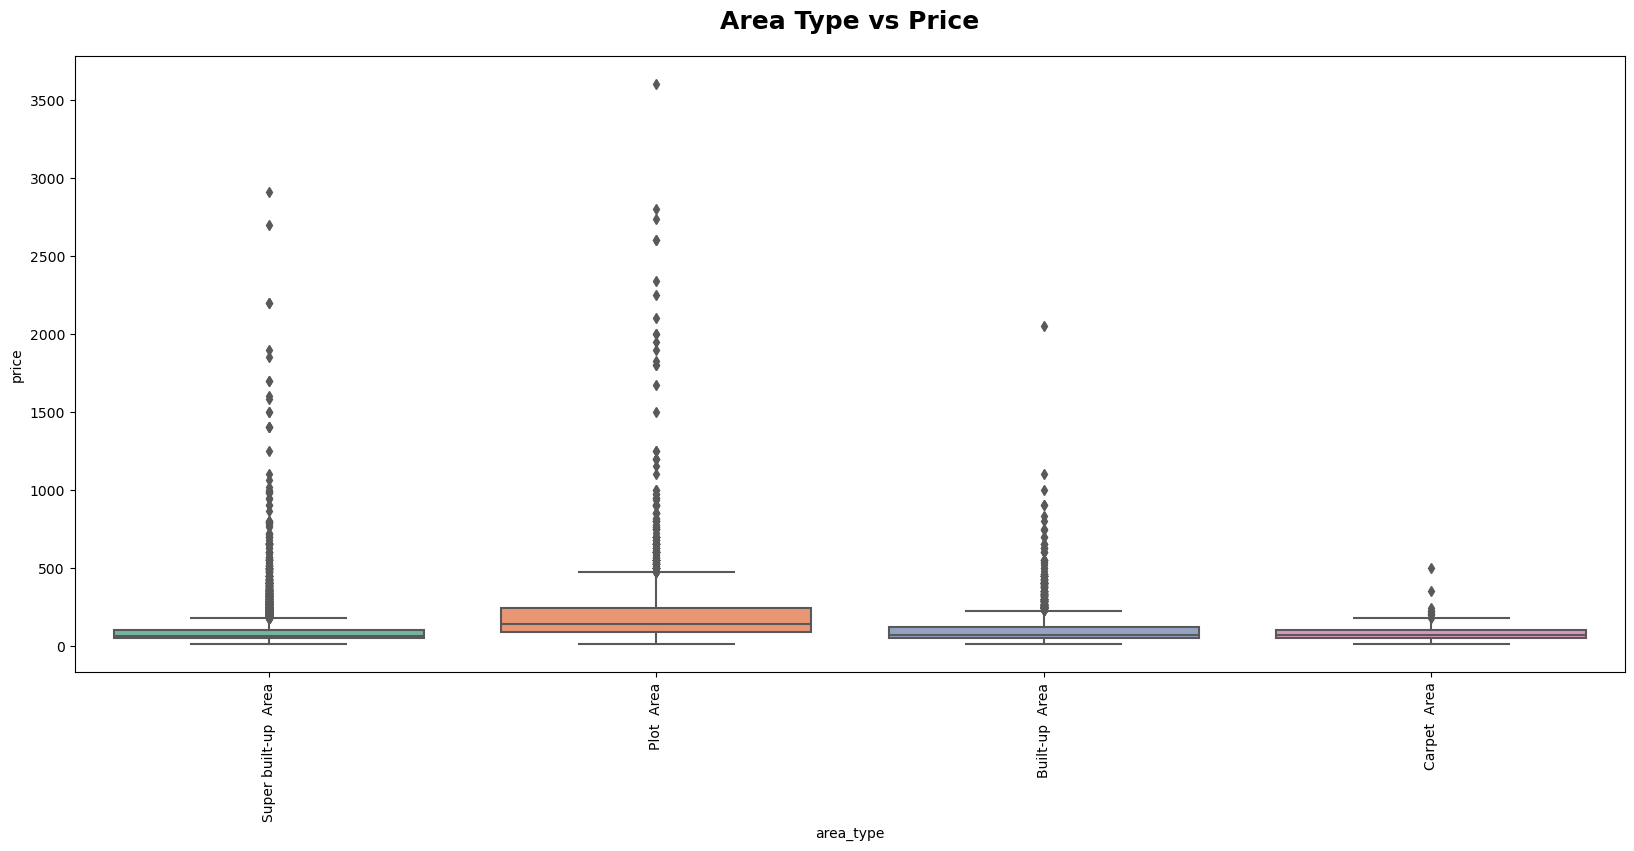

In [73]:
plt.figure(figsize=(20,8))
sns.boxplot(x="area_type",y="price",data=df,palette="Set2")
plt.title(f"Area Type vs Price",pad=20,fontweight="black",fontsize=18)
plt.xticks(rotation=90)

from the dataset , we can tell that:
Super built area has the most count with 8278 counts and and carpet area with the least with only 87 counts


that's to say, super built area occupies 65% of the data and carpet area with only 0.7%

The most expensive area according to the data is plot area

The least expensive is also carpet area

# Price analysis

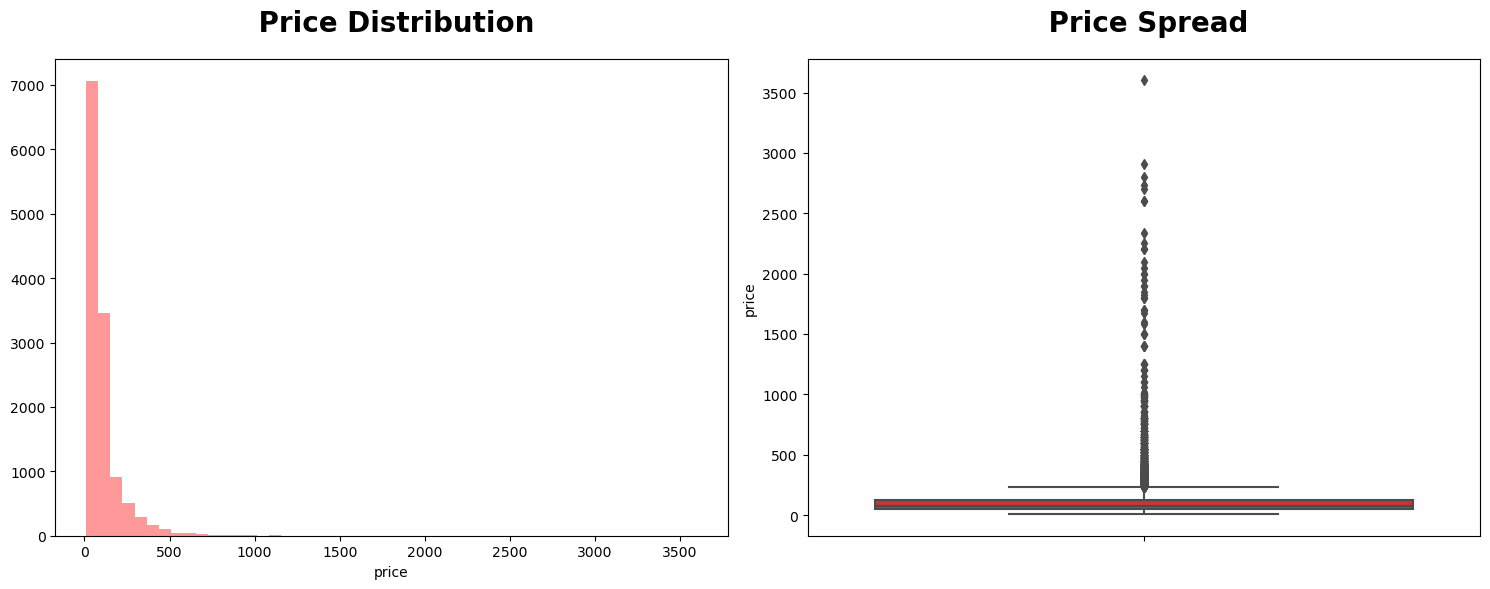

In [74]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=False)
plt.title(" Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set1")
plt.title(" Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

let's analyse the price distribution

it's skewed left which means there are few outliers in the data, as we can see from the right side of the figure



# availability	

let's narrow down the availability column to the month instead of the day


In [75]:
def remove_date(number):
    try:
        new_num=number.split("-")[1]
        return new_num
    except:
        return number
df["availability"]=df["availability"].apply(remove_date)


In [76]:
df["availability"].value_counts()

availability
Ready To Move    10138
Dec                674
May                333
Apr                296
Mar                242
Aug                236
Jun                193
Jul                191
Jan                112
Oct                 90
Sep                 78
Nov                 76
Feb                 75
Name: count, dtype: int64

[Text(0, 0, '10138'),
 Text(0, 0, '674'),
 Text(0, 0, '333'),
 Text(0, 0, '296'),
 Text(0, 0, '242'),
 Text(0, 0, '236'),
 Text(0, 0, '193'),
 Text(0, 0, '191'),
 Text(0, 0, '112'),
 Text(0, 0, '90'),
 Text(0, 0, '78'),
 Text(0, 0, '76'),
 Text(0, 0, '75')]

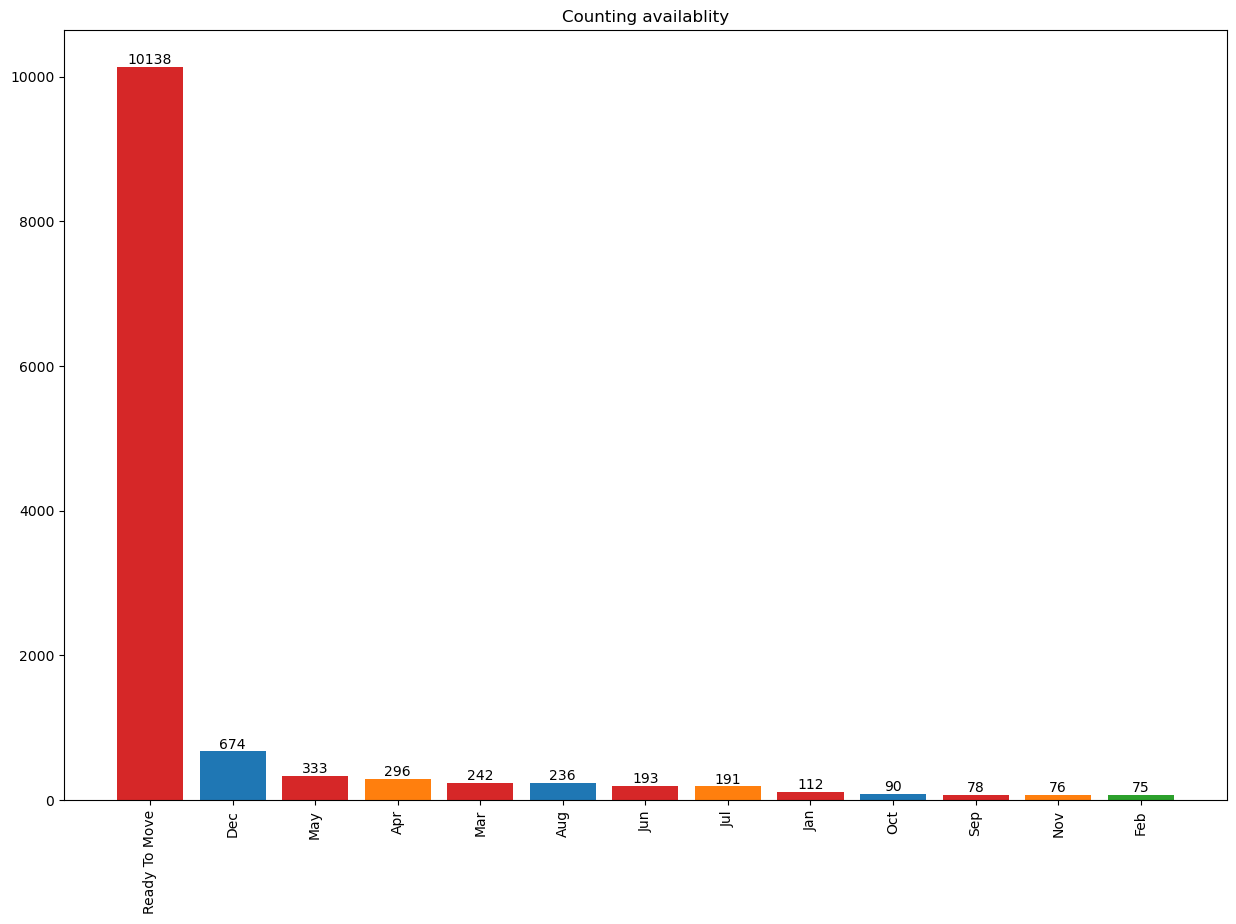

In [77]:
fig, ax = plt.subplots(figsize=(15, 10))
branch = list(df["availability"].value_counts().index)
values = list(df["availability"].value_counts().values)
bar_labels = ['red', 'blue', '_red', 'orange']*3+["red"]
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']*3+["tab:green"]
ax.bar(branch,values,label=bar_labels,color=bar_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Counting availablity")
ax.bar_label(ax.containers[0])

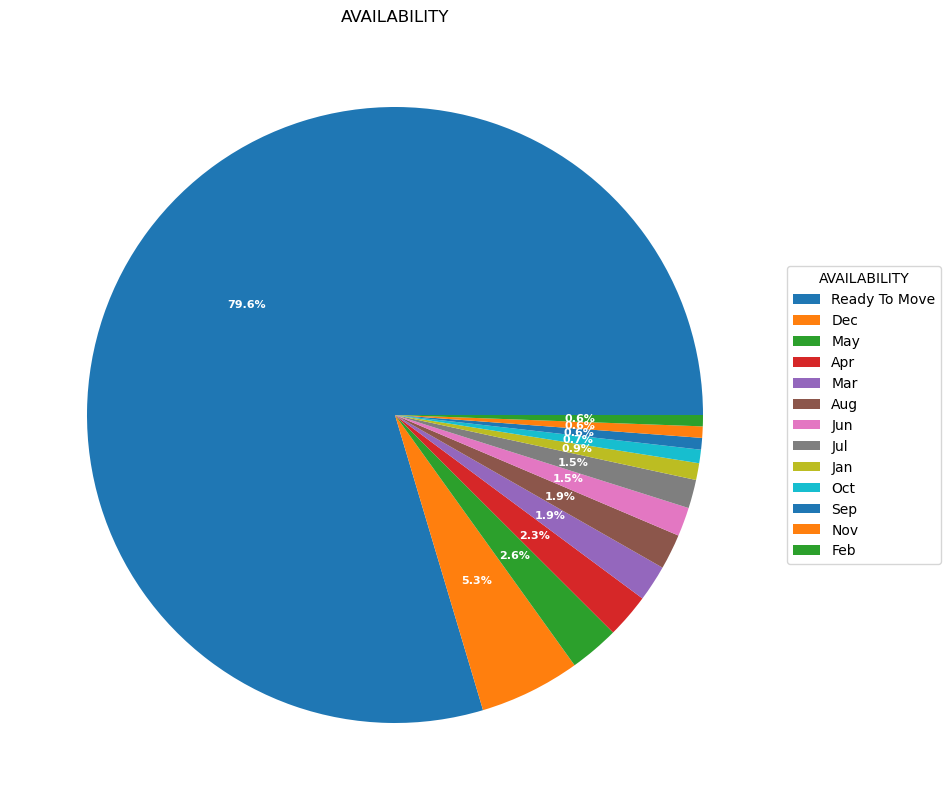

In [78]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

values= list(df["availability"].value_counts().values)
branches= list(df["availability"].value_counts().index)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                  textprops=dict(color="w"))
ax.legend(wedges, branches,
          title="AVAILABILITY",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("AVAILABILITY")

plt.show()

Text(0.5, 1.0, 'AVAILABILITY VS PRICE')

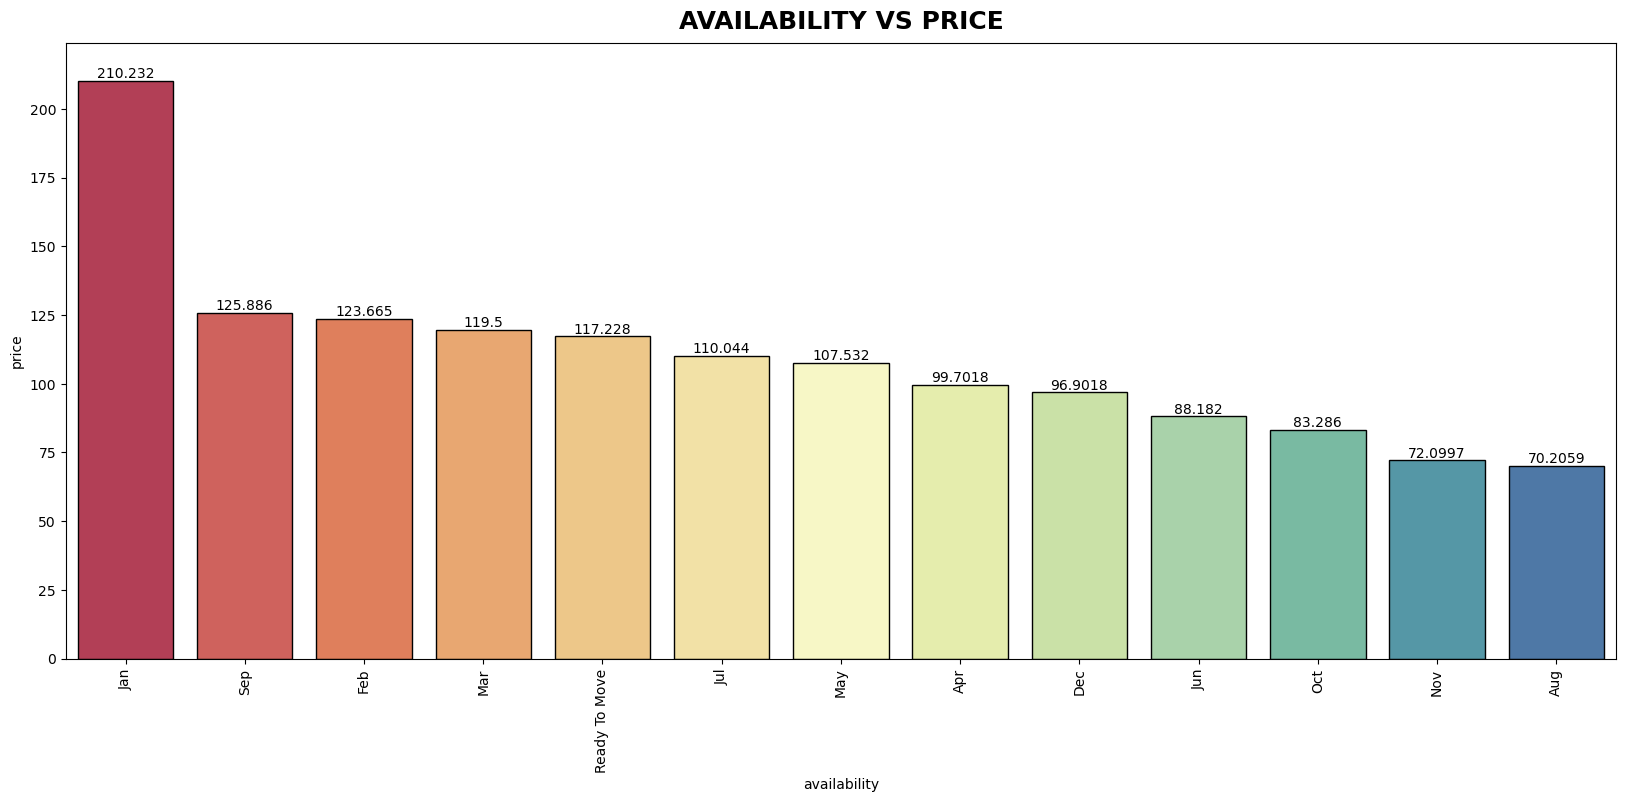

In [79]:
plt.figure(figsize=(20,8))
df["availability"].value_counts()
cols_list = df.groupby(df["availability"])["price"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["availability"], y = 'price', data = df[df["availability"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 90);
ax.bar_label(ax.containers[0])
plt.title(f'AVAILABILITY VS PRICE',pad=10,fontweight="black",fontsize=18)
    

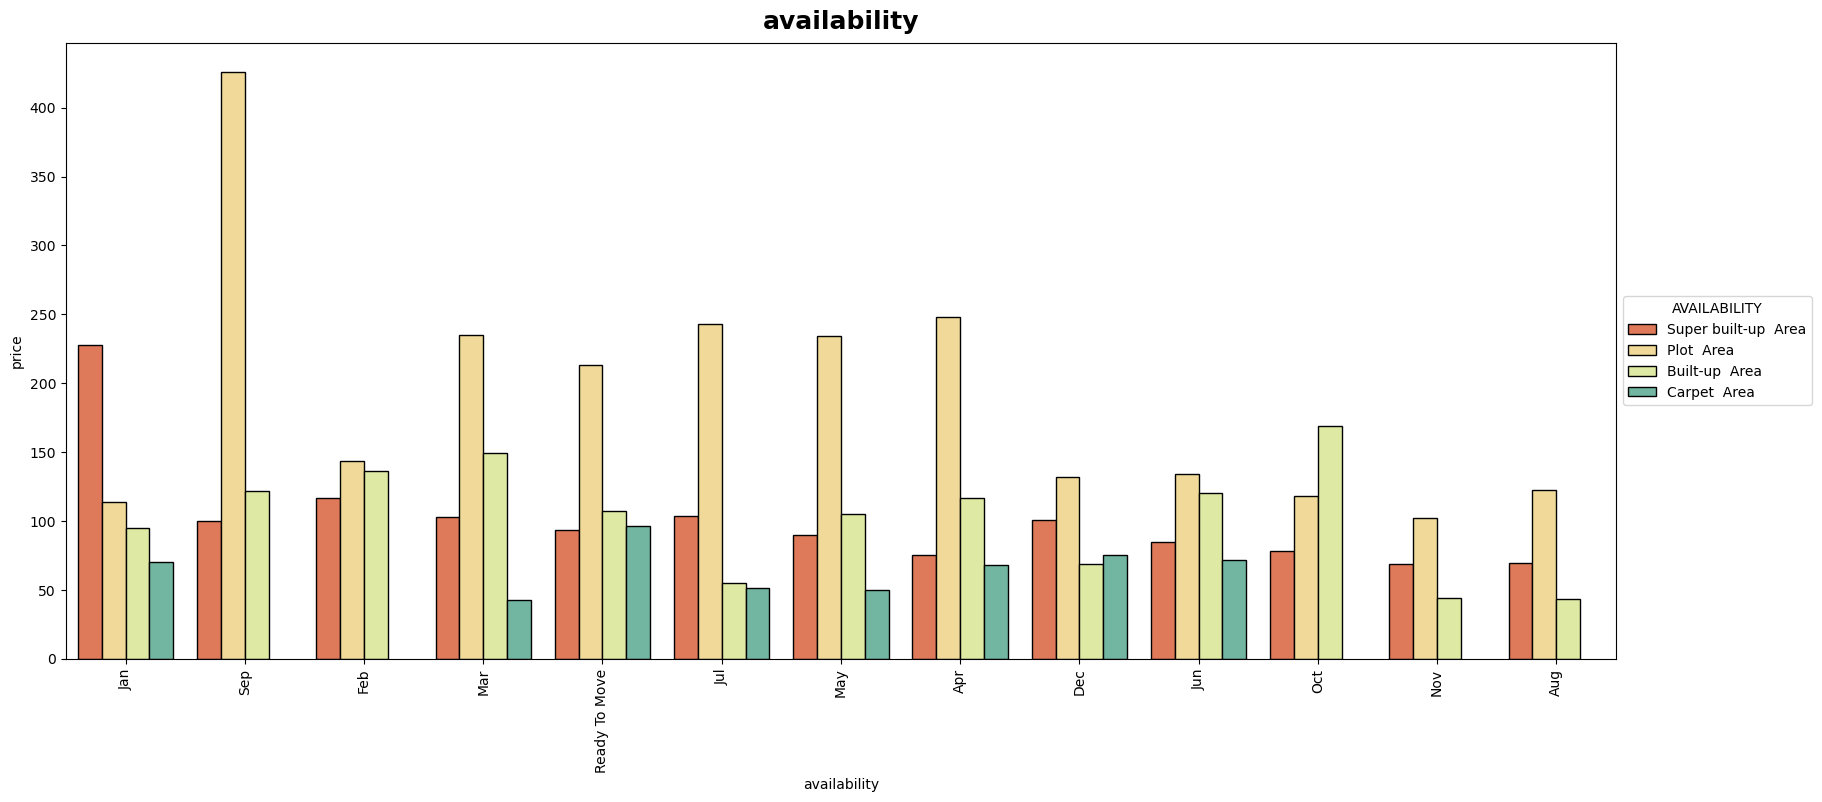

In [80]:
    
plt.figure(figsize=(20,8))
df["availability"].value_counts()
cols_list = df.groupby("availability")["price"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "availability", y = 'price', data = df[df["availability"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="area_type",
                    edgecolor = "black")
plt.xticks(rotation = 90);
#ax.bar_label(ax.containers[0])
plt.title(f'availability',pad=10,fontweight="black",fontsize=18)
ax.legend(
          title="AVAILABILITY",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Dec'),
  Text(1, 0, 'Ready To Move'),
  Text(2, 0, 'May'),
  Text(3, 0, 'Feb'),
  Text(4, 0, 'Nov'),
  Text(5, 0, 'Oct'),
  Text(6, 0, 'Sep'),
  Text(7, 0, 'Mar'),
  Text(8, 0, 'Apr'),
  Text(9, 0, 'Aug'),
  Text(10, 0, 'Jun'),
  Text(11, 0, 'Jan'),
  Text(12, 0, 'Jul')])

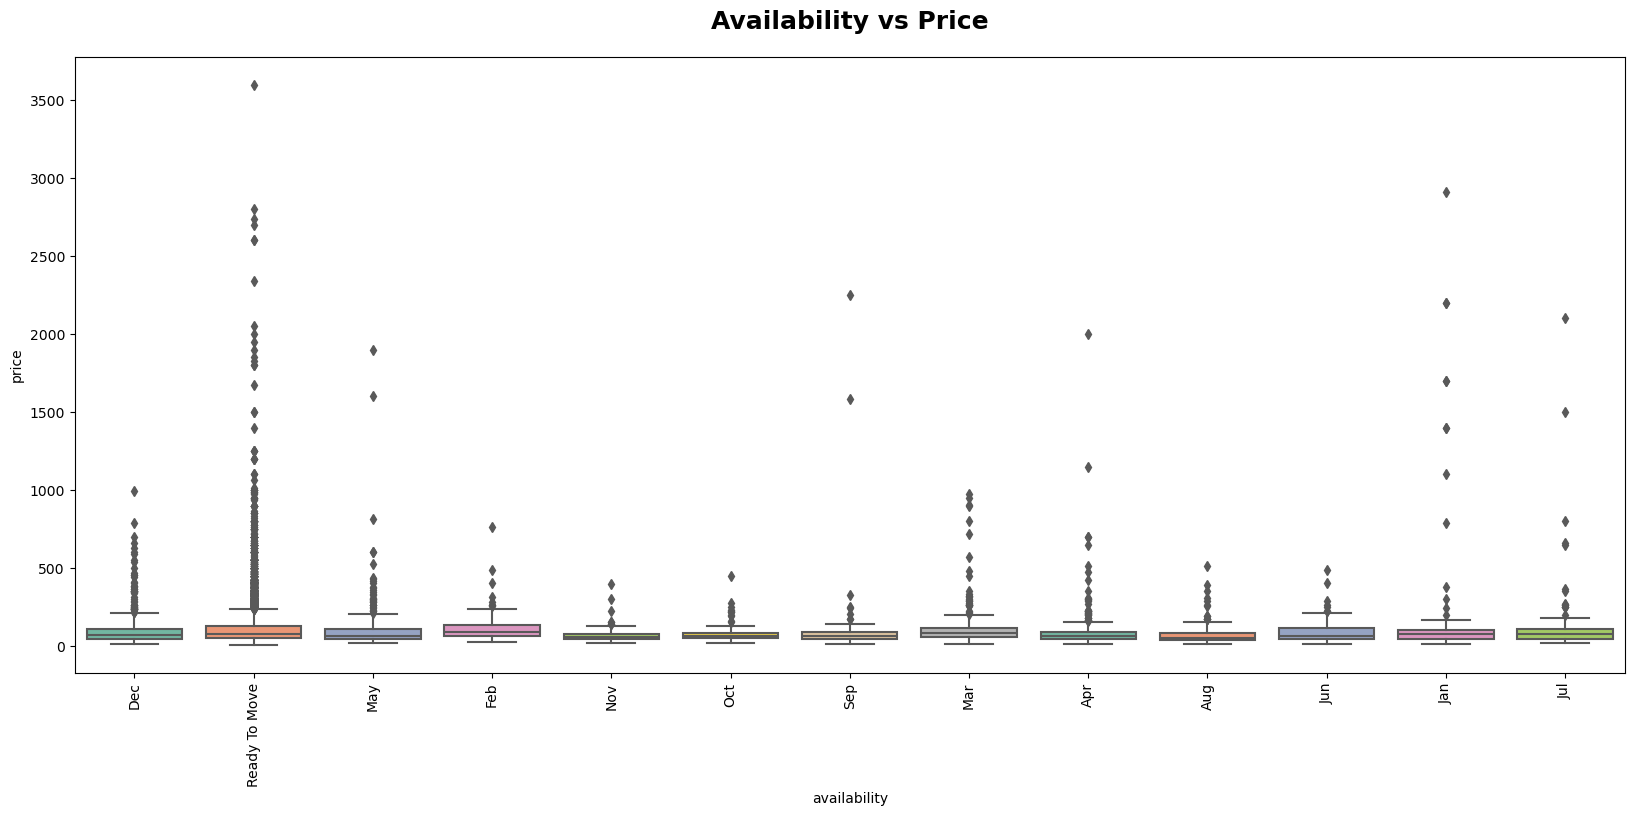

In [81]:
plt.figure(figsize=(20,8))
sns.boxplot(x="availability",y="price",data=df,palette="Set2")
plt.title(f"Availability vs Price",pad=20,fontweight="black",fontsize=18)
plt.xticks(rotation=90)

from the availability column , we can conclude that:
most of the data recorded or surveyed are ready to move, about 10138 , about 79.6% of the people 

but January, september and Feburary actually had most price sales  

with these month being a factor for hiher sales in houses,Plot area was also the leading area type being 

purchased in those months

# location

In [82]:
df["location"].nunique()

1304

Text(0.5, 1.0, 'TOP 100 LOCATIONS VS PRICE')

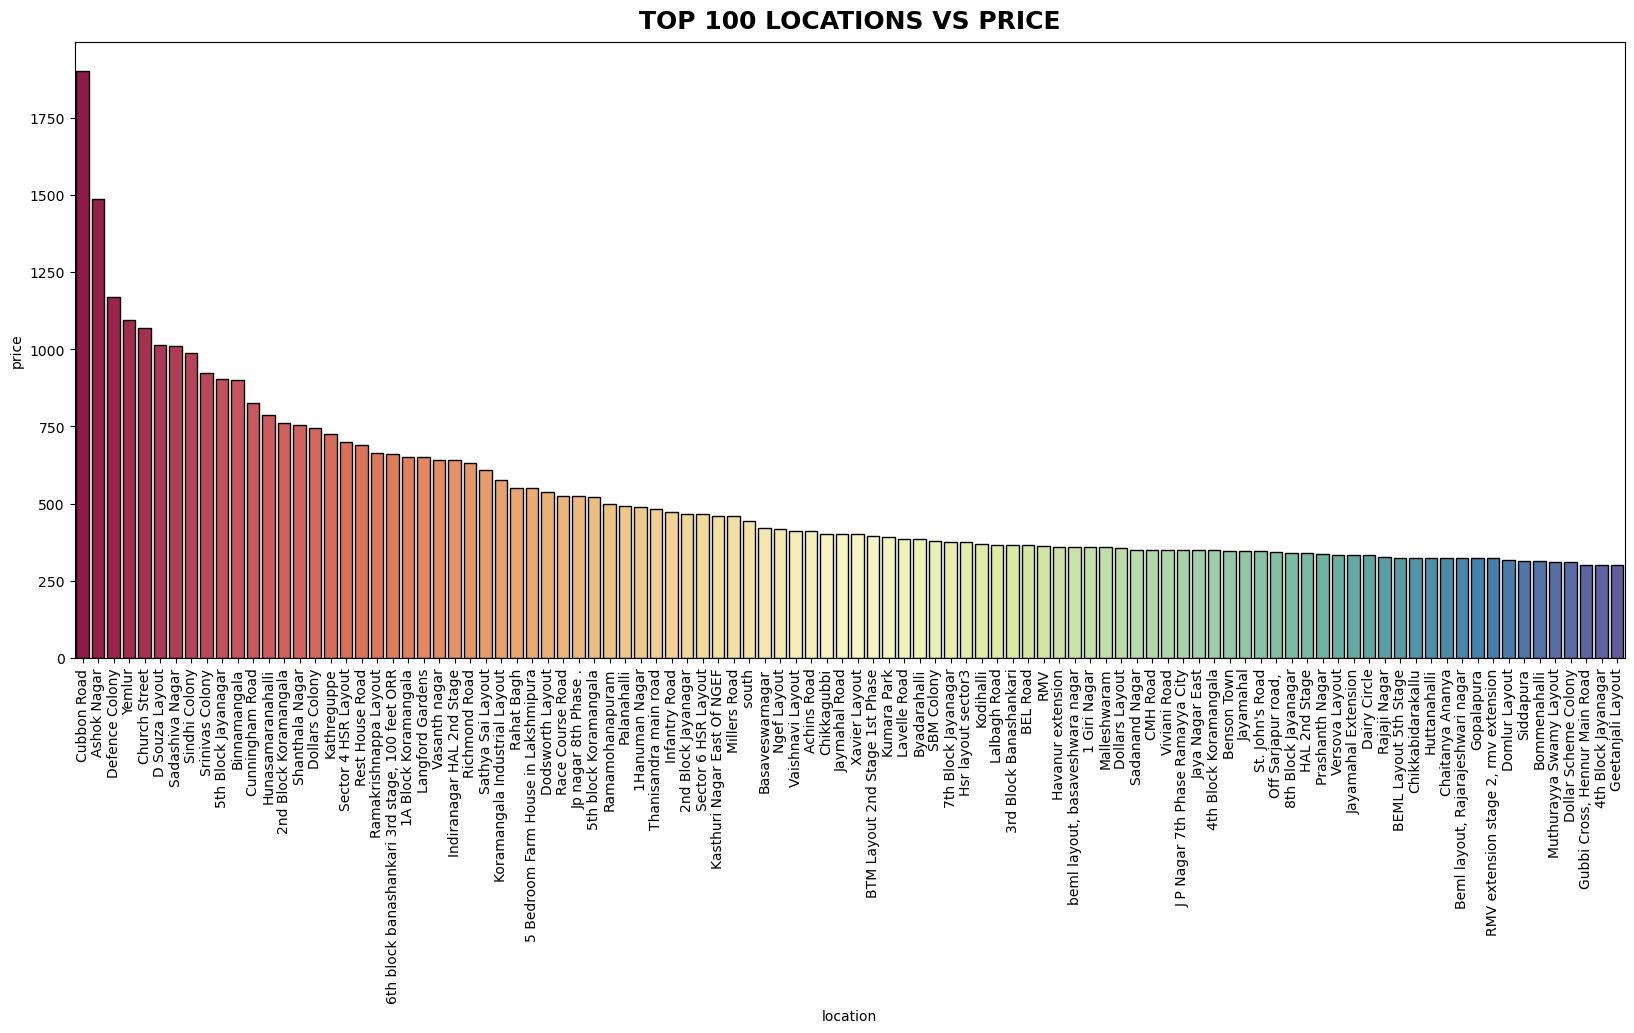

In [83]:
plt.figure(figsize=(20,8))
df["location"].value_counts()
cols_list = df.groupby(df["location"])["price"].mean().sort_values(ascending=False).index[0:100].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["location"], y = 'price', data = df[df["location"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 90);
#ax.bar_label(ax.containers[0],rotation=90)
plt.title(f'TOP 100 LOCATIONS VS PRICE',pad=10,fontweight="black",fontsize=18)
    
    

    

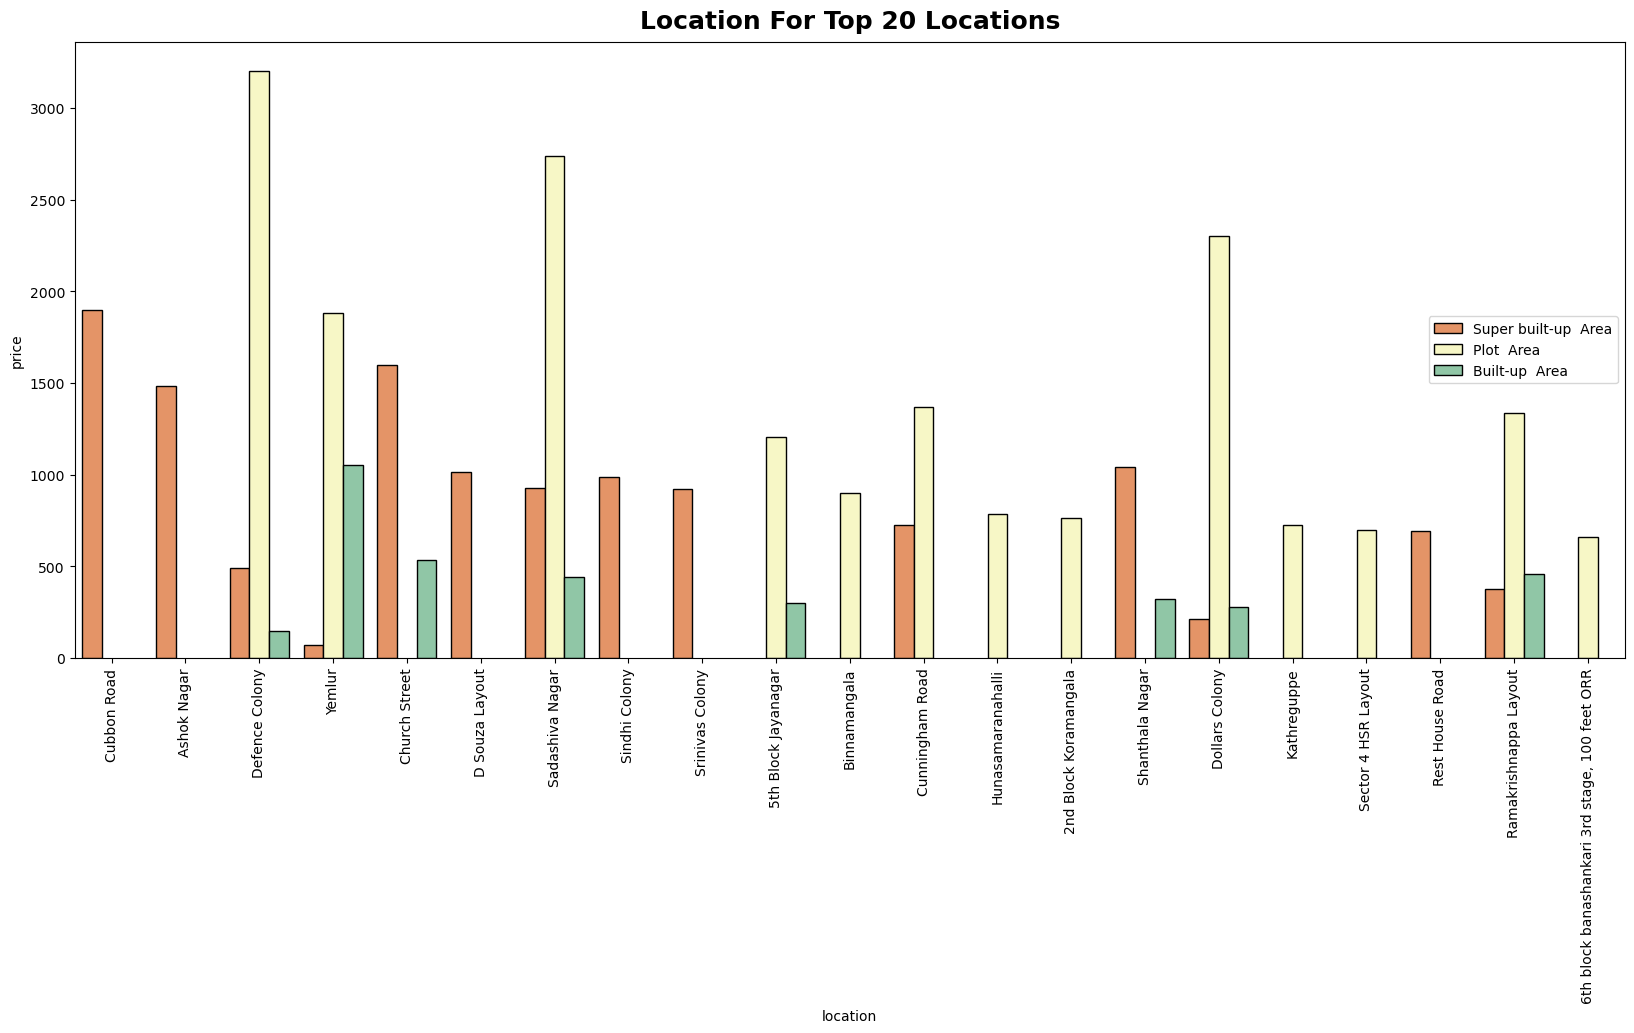

In [84]:
    
plt.figure(figsize=(20,8))
df["location"].value_counts()
cols_list = df.groupby("location")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "location", y = 'price', data = df[df["location"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="area_type",
                    edgecolor = "black")
plt.xticks(rotation = 90);
#ax.bar_label(ax.containers[0],rotation=90)
plt.title(f'Location For Top 20 Locations',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


We can tell that:

Cubbon Road,Ashok nagar are the two most expensive location to reside in
 


# Other properties

Text(0.5, 1.0, 'COUNTS')

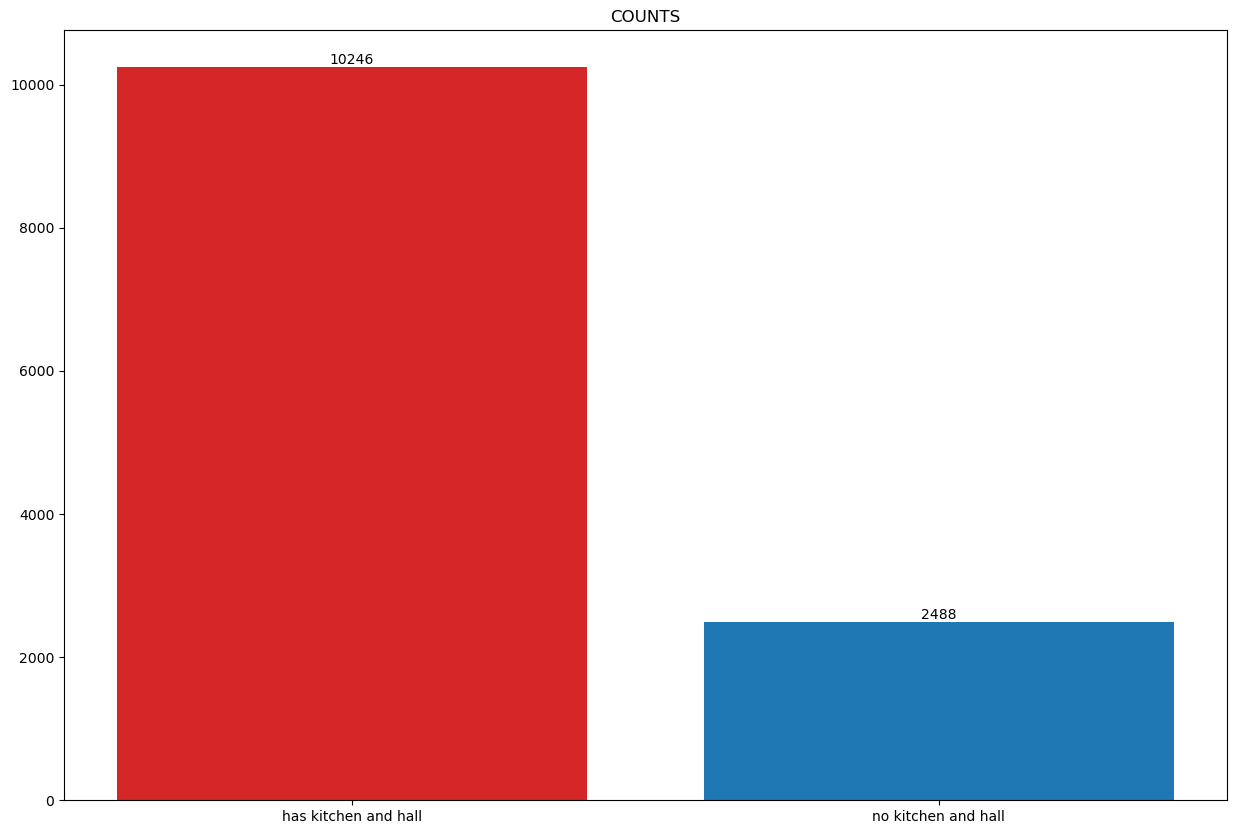

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
branch = list(df["other_property"].value_counts().index)
values = list(df["other_property"].value_counts().values)
bar_labels = ['_red', 'orange']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(branch,values,label=bar_labels,color=bar_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title("COUNTS")

Text(0.5, 1.0, '(KITCHEN AND HALL AVAILABILITY) VS PRICE')

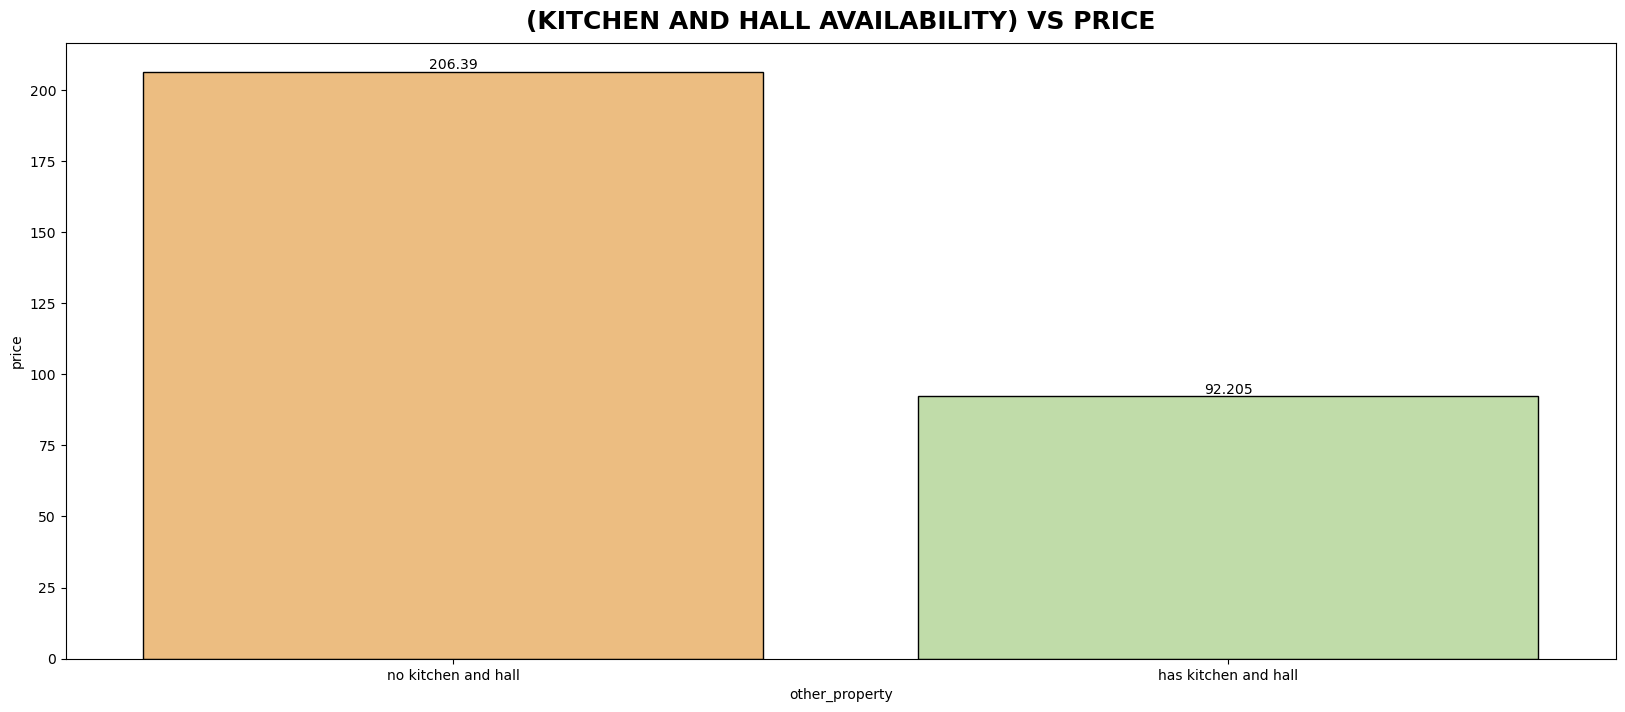

In [86]:
plt.figure(figsize=(20,8))
df["other_property"].value_counts()
cols_list = df.groupby(df["other_property"])["price"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["other_property"], y = 'price', data = df[df["other_property"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0])
plt.title(f'(KITCHEN AND HALL AVAILABILITY) VS PRICE',pad=10,fontweight="black",fontsize=18)
    

Text(0.5, 1.0, '(KITCHEN AND HALL AVAILABILITY) VS TOTAL ROOMS')

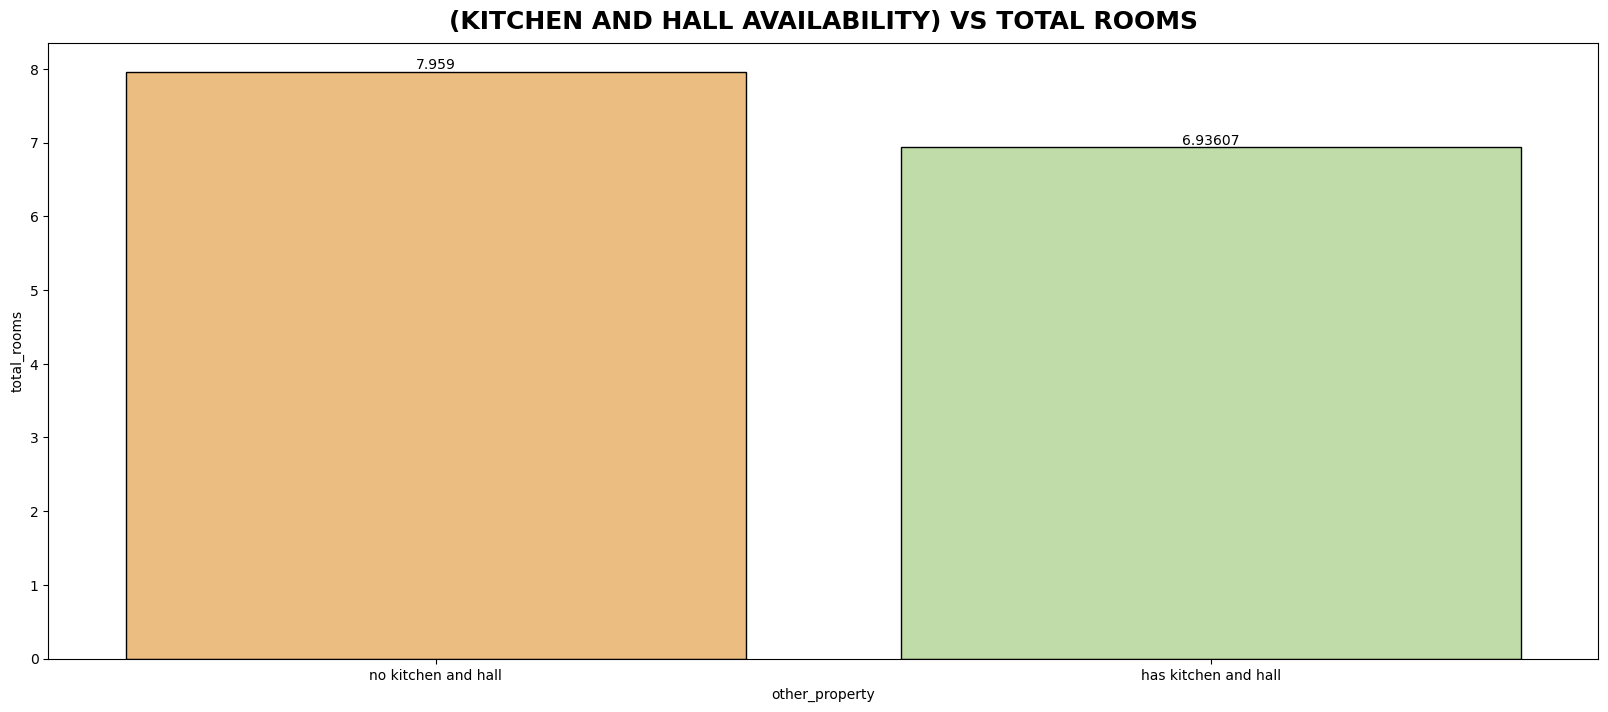

In [87]:
plt.figure(figsize=(20,8))
df["other_property"].value_counts()
cols_list = df.groupby(df["other_property"])["total_rooms"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["other_property"], y = 'total_rooms', data = df[df["other_property"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0])
plt.title(f'(KITCHEN AND HALL AVAILABILITY) VS TOTAL ROOMS',pad=10,fontweight="black",fontsize=18)
    

Text(0.5, 1.0, '(KITCHEN AND HALL AVAILABILITY) VS TOTAL SqFT')

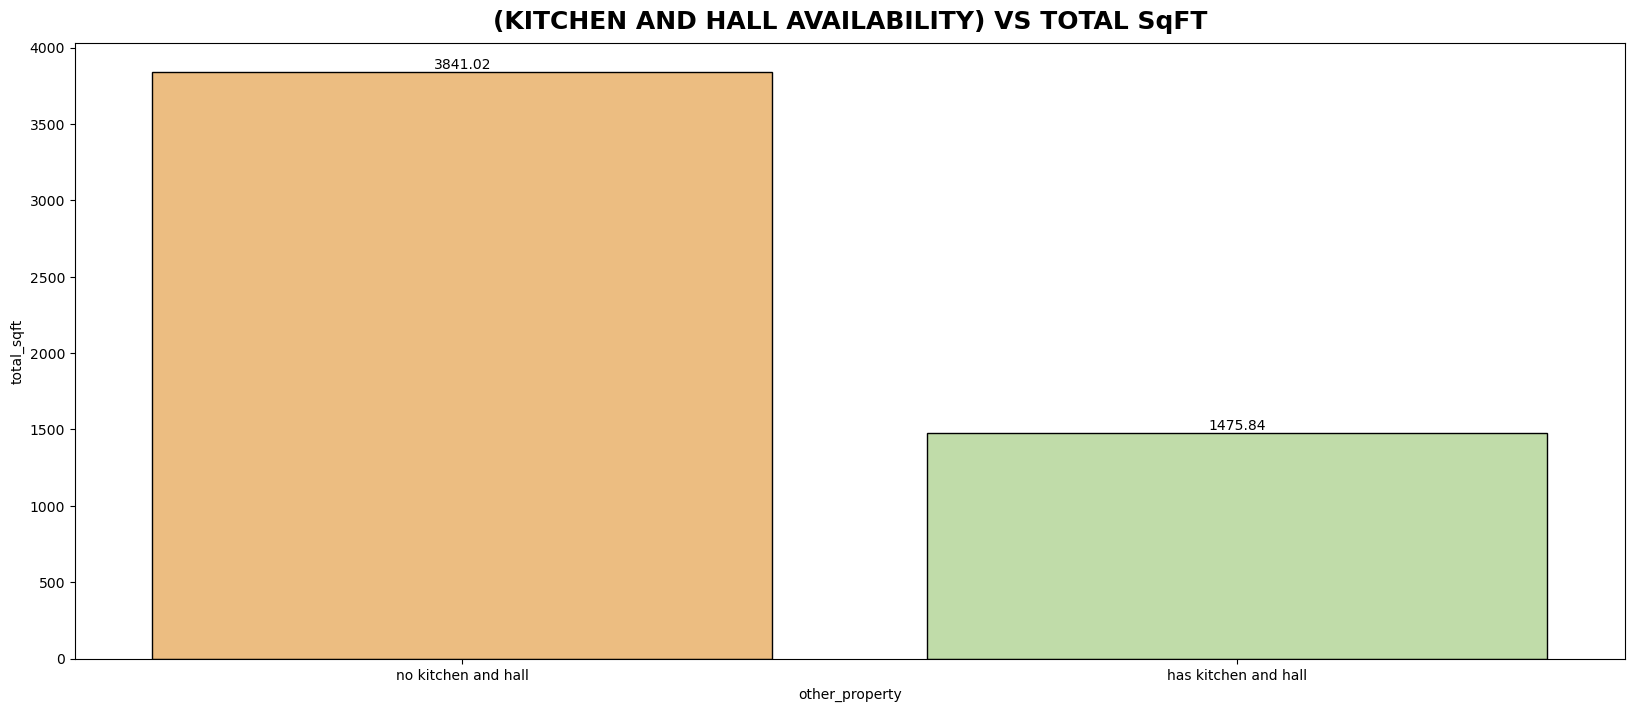

In [88]:
plt.figure(figsize=(20,8))
df["other_property"].value_counts()
cols_list = df.groupby(df["other_property"])["total_sqft"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["other_property"], y = 'total_sqft', data = df[df["other_property"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0])
plt.title(f'(KITCHEN AND HALL AVAILABILITY) VS TOTAL SqFT',pad=10,fontweight="black",fontsize=18)
    

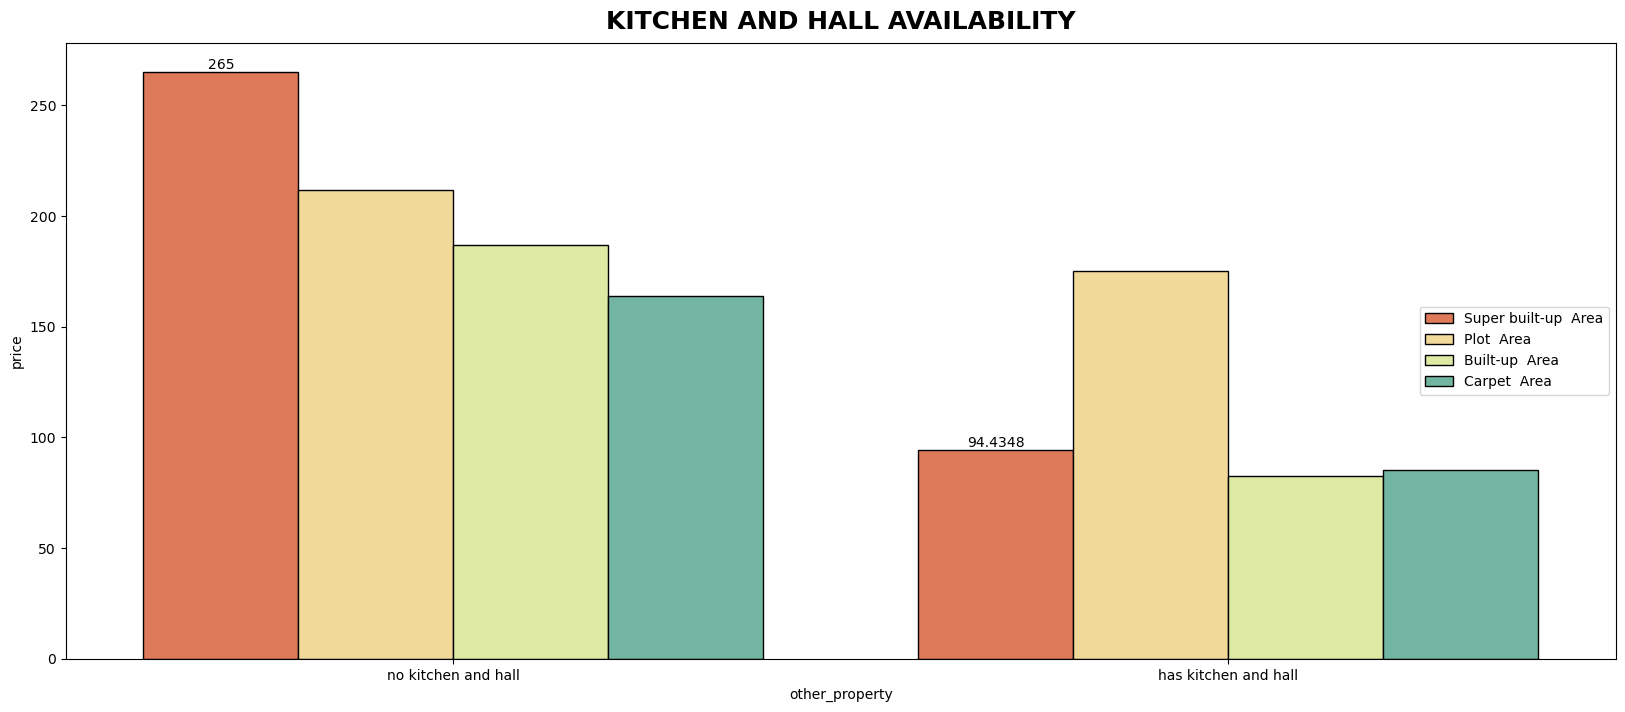

In [89]:
    
plt.figure(figsize=(20,8))
df["other_property"].value_counts()
cols_list = df.groupby("other_property")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "other_property", y = 'price', data = df[df["other_property"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="area_type",
                    edgecolor = "black")
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0],rotation=0)
plt.title(f'KITCHEN AND HALL AVAILABILITY',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


Majority of the houses have kitchen and halls

but surprisingly, I found out houses with no kitchen and halls are more expensive than ones with K&H

I continued to dig to find out why that is possible

The dataset showed that rooms with no kitchen and hall covered the most sq feet

sq feet was a factor as to why no kitchen and halls are more expensive , 

with total room also contributing 

BEDROOM

<Axes: xlabel='bedroom', ylabel='price'>

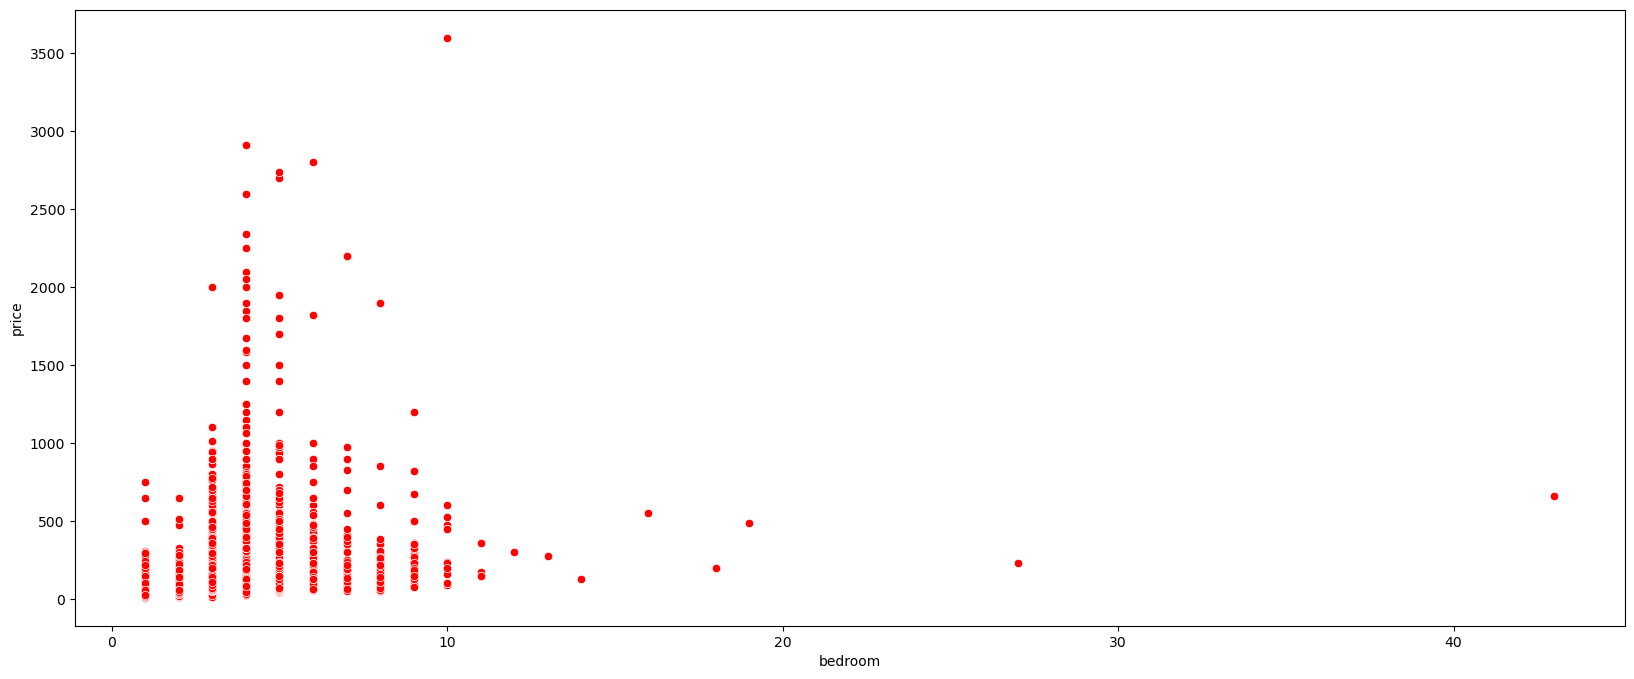

In [90]:
plt.figure(figsize=(20,8))
sns.scatterplot(x="bedroom",y="price",data=df,palette = 'Set3',color="r",markers=True)

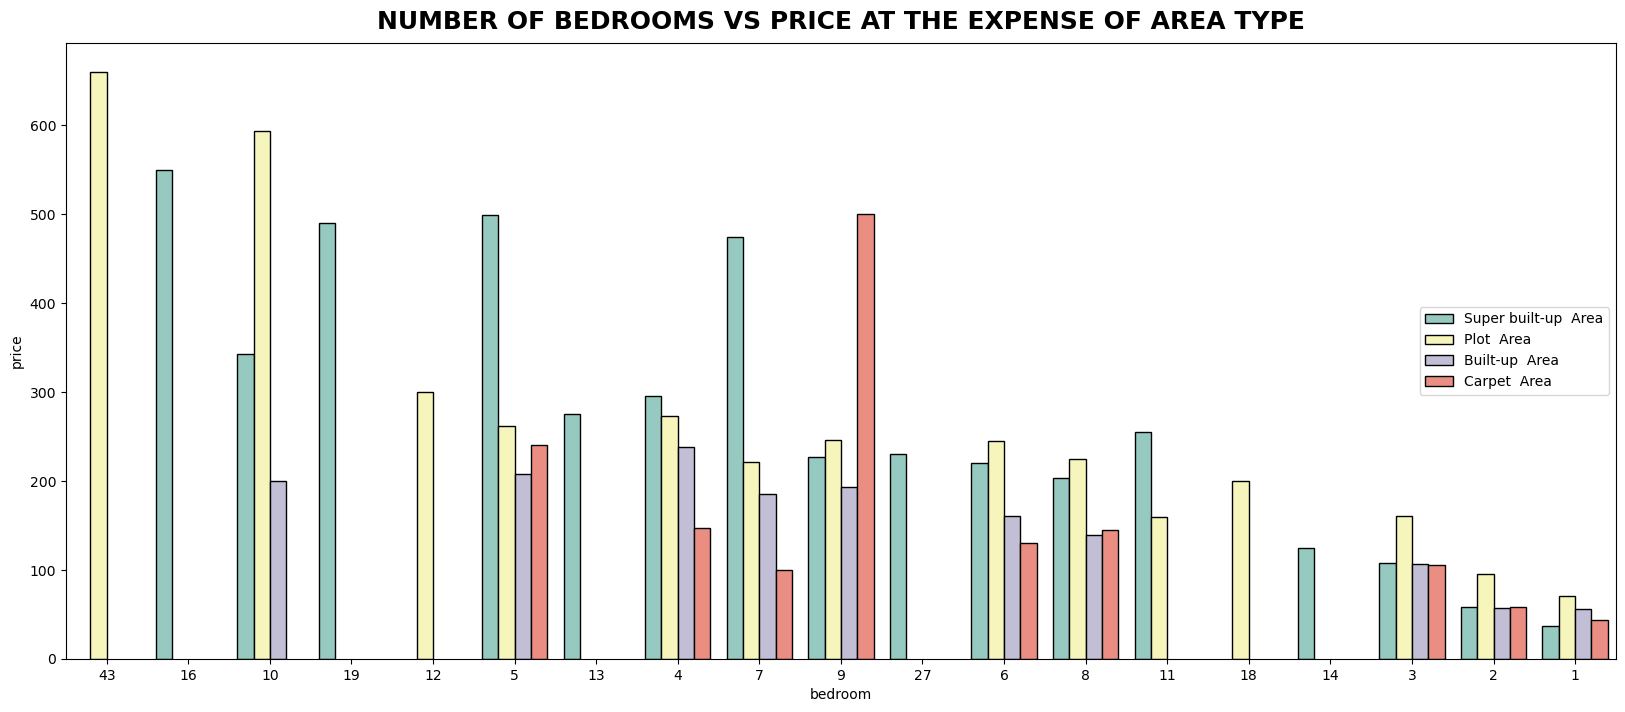

In [91]:
    
plt.figure(figsize=(20,8))
df["bedroom"].value_counts()
cols_list = df.groupby("bedroom")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "bedroom", y = 'price', data = df[df["bedroom"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Set3', 
                    ci = False,
                   hue="area_type",
                    edgecolor = "black")
plt.xticks(rotation = 0);
#ax.bar_label(ax.containers[0],rotation=0)
plt.title(f'NUMBER OF BEDROOMS VS PRICE AT THE EXPENSE OF AREA TYPE',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


two bedrooms had the most occurance in the data , 

but super built-up area and plot area being the causing factor for 

people choosing a particular number of room

BATH

Text(0.5, 1.0, 'Number of Bathrooms')

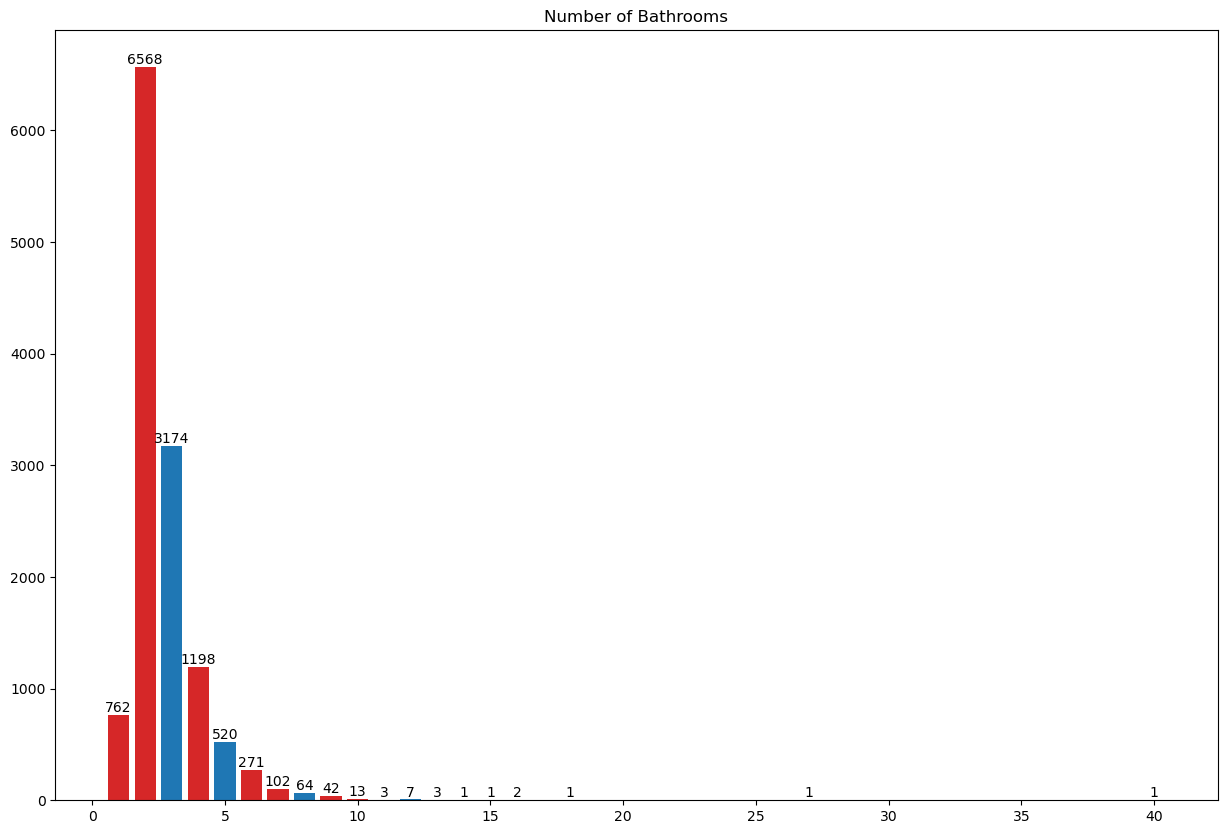

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
branch = list(df["bath"].value_counts().index)
values = list(df["bath"].value_counts().values)
bar_labels = ['red', 'blue', '_red']*6+["blue"]
bar_colors = ['tab:red', 'tab:blue', 'tab:red']*6+['tab:blue']
ax.bar(branch,values,label=bar_labels,color=bar_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title("Number of Bathrooms")

Text(0.5, 1.0, 'BATHROOM VS PRICE')

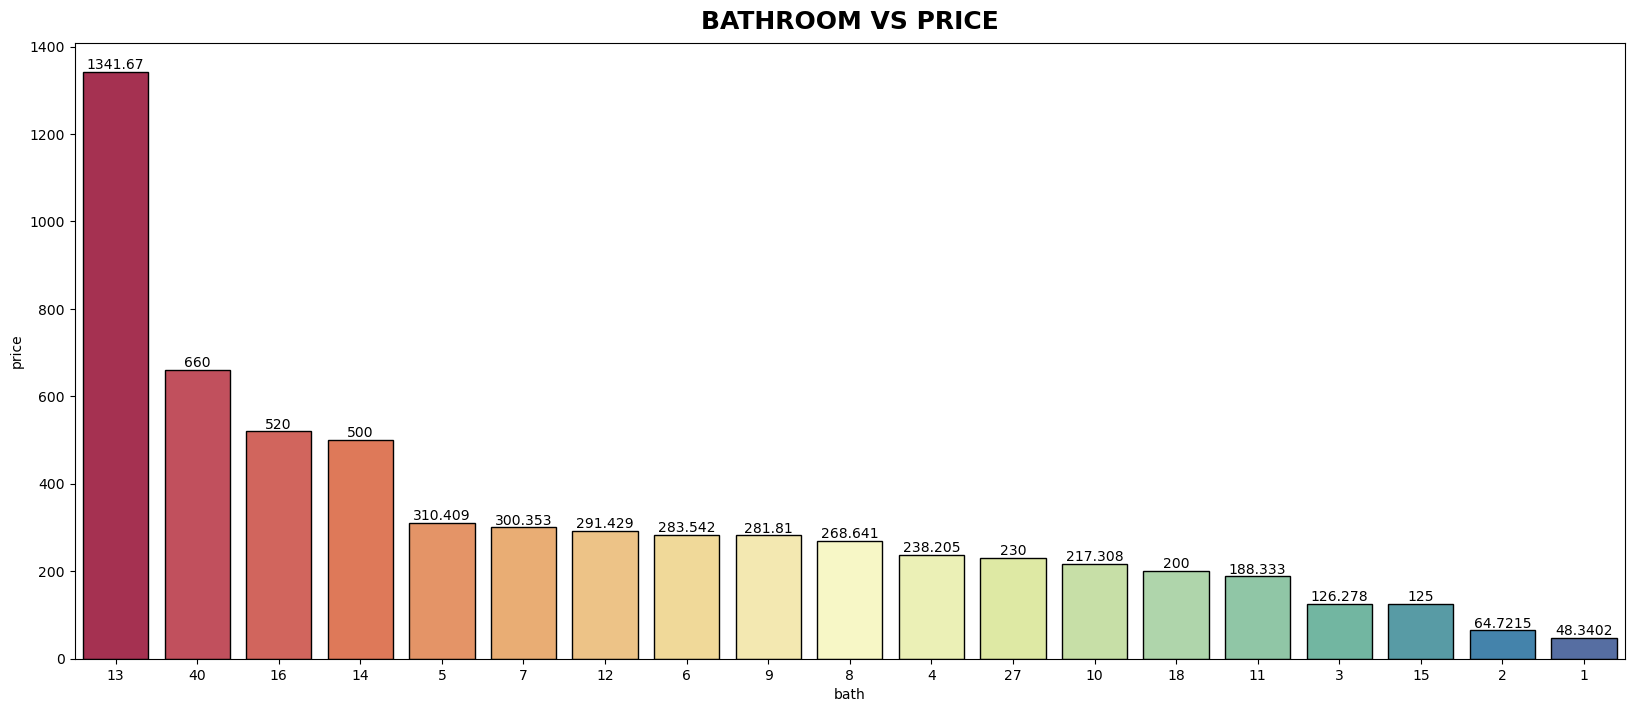

In [93]:
plt.figure(figsize=(20,8))
df["bath"].value_counts()
cols_list = df.groupby(df["bath"])["price"].mean().sort_values(ascending=False).index[0:].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x =df["bath"], y = 'price', data = df[df["bath"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0])
plt.title(f'BATHROOM VS PRICE',pad=10,fontweight="black",fontsize=18)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


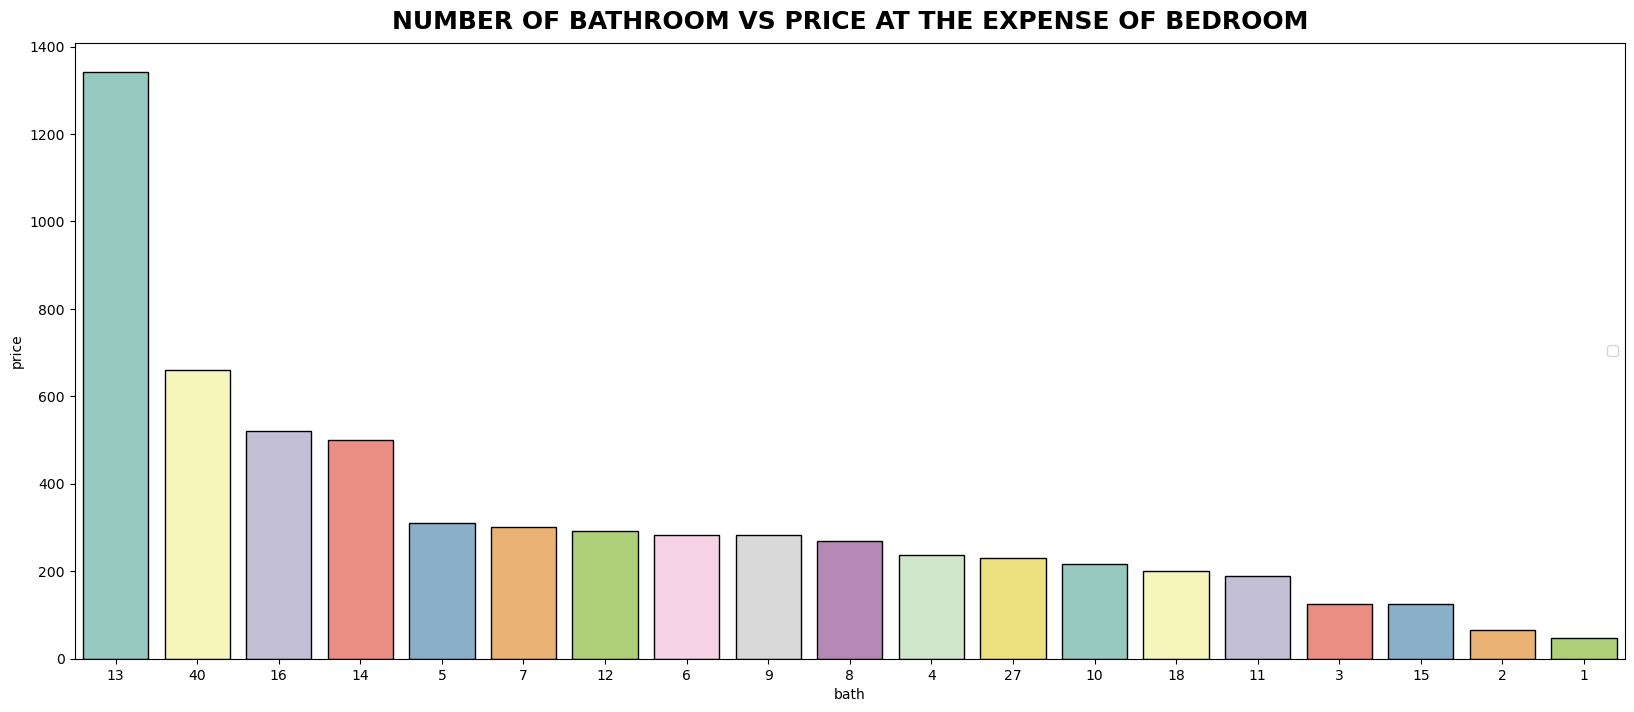

In [94]:
    
plt.figure(figsize=(20,8))
df["bath"].value_counts()
cols_list = df.groupby("bath")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "bath", y = 'price', data = df[df["bath"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Set3', 
                    ci = False,
                   #hue="bedroom",
                    edgecolor = "black")
plt.xticks(rotation = 0);
#ax.bar_label(ax.containers[0],rotation=0)
plt.title(f'NUMBER OF BATHROOM VS PRICE AT THE EXPENSE OF BEDROOM',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


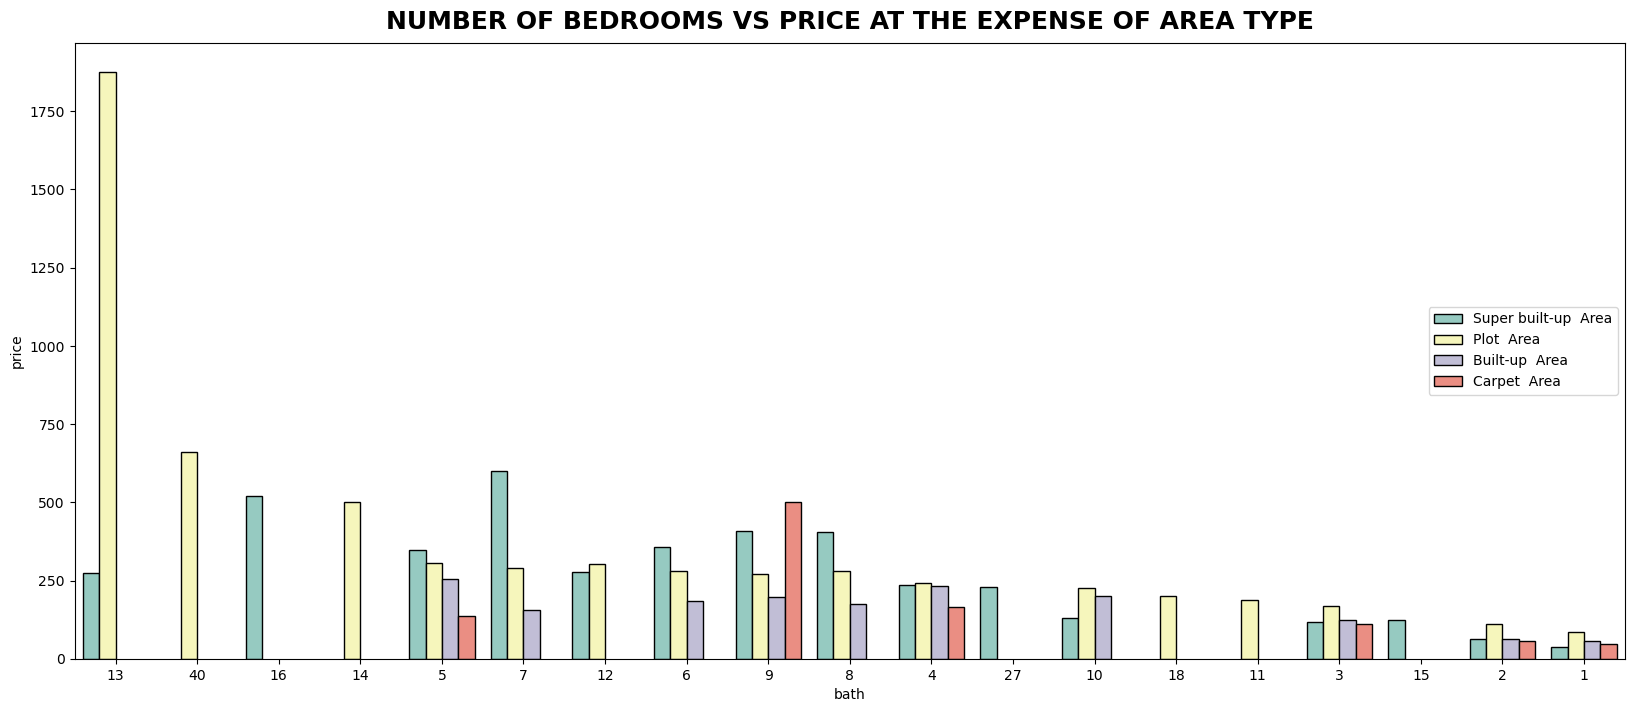

In [95]:
    
plt.figure(figsize=(20,8))
df["bath"].value_counts()
cols_list = df.groupby("bath")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "bath", y = 'price', data = df[df["bath"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Set3', 
                    ci = False,
                   hue="area_type",
                    edgecolor = "black")
plt.xticks(rotation = 0);
#ax.bar_label(ax.containers[0],rotation=0)
plt.title(f'NUMBER OF BEDROOMS VS PRICE AT THE EXPENSE OF AREA TYPE',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


two bathrooms had the most occurance in the data , 

but 9 bathrooms houses were the most expensive in the data, followed by 6

but super built-up area and plot area being the causing factor for 

people choosing a particular number of bathroom

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


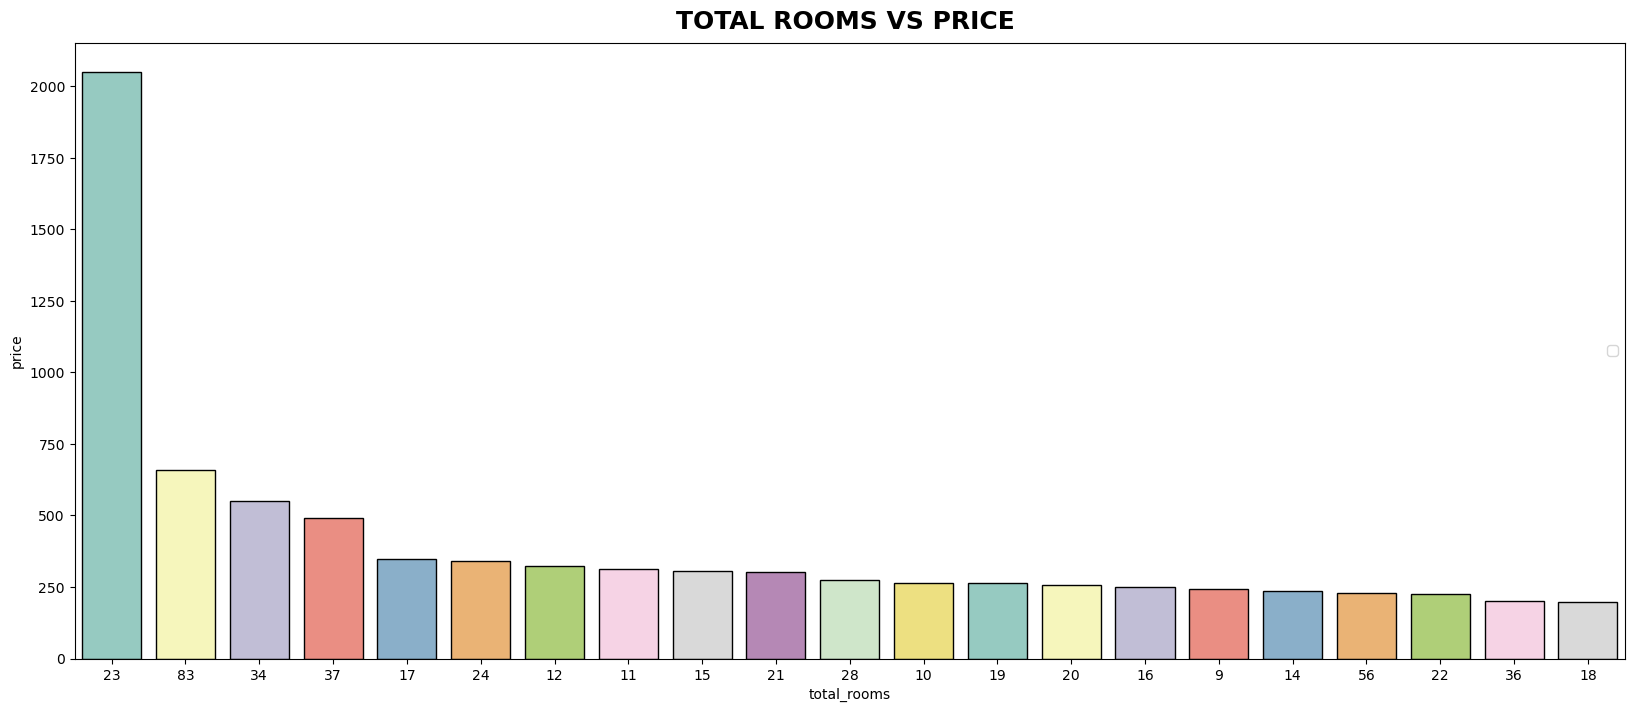

In [96]:
    
plt.figure(figsize=(20,8))
df["total_rooms"].value_counts()
cols_list = df.groupby("total_rooms")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "total_rooms", y = 'price', data = df[df["total_rooms"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Set3', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 0);
#ax.bar_label(ax.containers[0],rotation=0)
plt.title(f'TOTAL ROOMS VS PRICE ',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


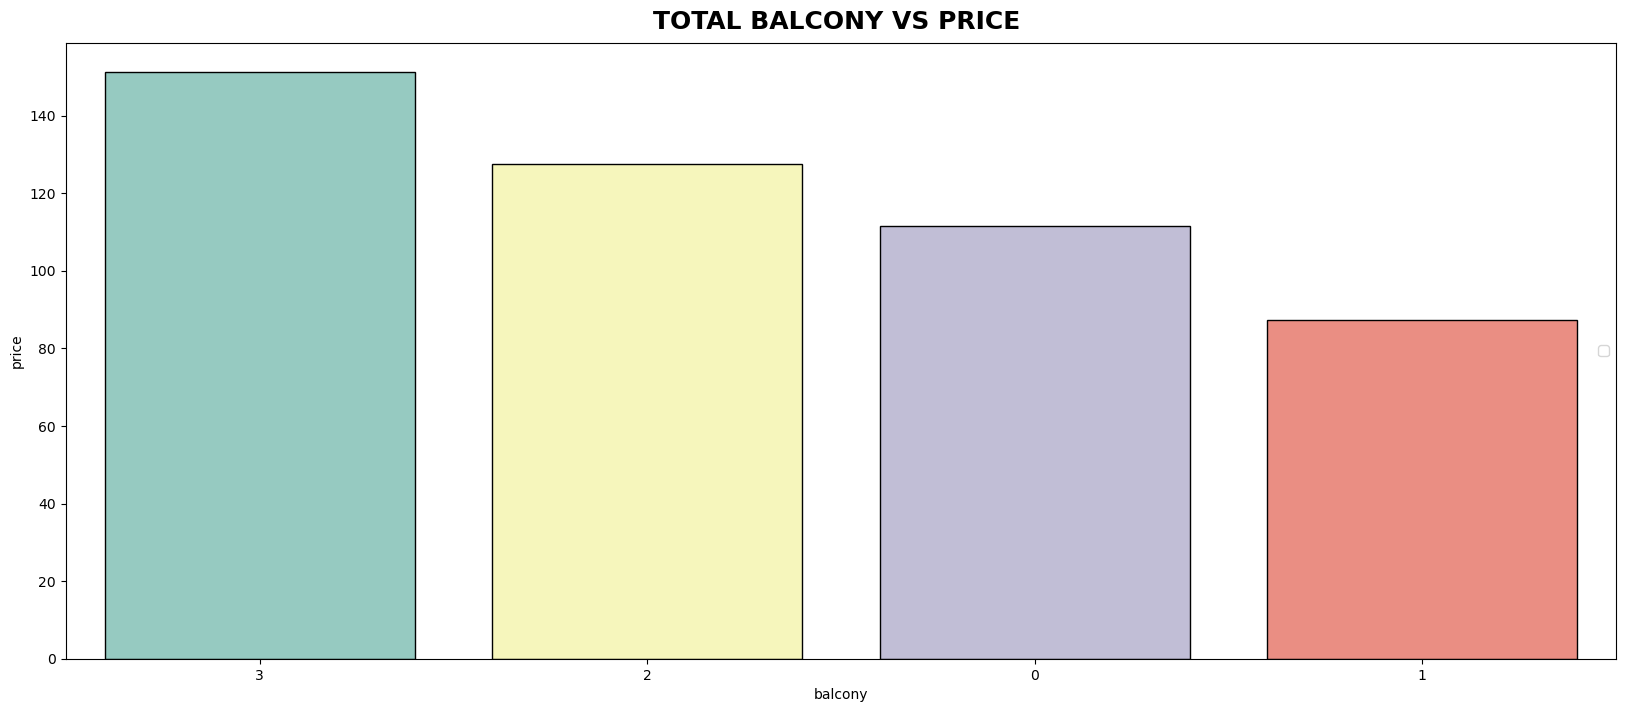

In [97]:
    
plt.figure(figsize=(20,8))
df["balcony"].value_counts()
cols_list = df.groupby("balcony")["price"].mean().sort_values(ascending=False).index[0:21].tolist()
cols_list_sorted = sorted(cols_list)
ax=sns.barplot(x = "balcony", y = 'price', data = df[df["balcony"].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Set3', 
                    ci = False,
                    edgecolor = "black")
plt.xticks(rotation = 0);
#ax.bar_label(ax.containers[0],rotation=0)
plt.title(f'TOTAL BALCONY VS PRICE ',pad=10,fontweight="black",fontsize=18)
ax.legend(loc="center right")


In [98]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,other_property,kitchen_and_hall,bedroom,total_rooms
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2,1,39.07,has kitchen and hall,2,2,6
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,no kitchen and hall,0,4,9
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2,3,62.00,has kitchen and hall,2,3,7
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,has kitchen and hall,2,3,8
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2,1,51.00,has kitchen and hall,2,2,6


MODEL EVALUATION

Let's first apply various ML/DL Model without eliminating outliers

LINEAR REGRESSION

In [99]:
df1=df.copy()
df1.shape

(12734, 12)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars,LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import*
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [101]:
ada=AdaBoostRegressor()
Ele=ElasticNet()
knn=KNeighborsRegressor()

In [102]:
num_cols=['area_type', 'availability', 'location',"other_property"]
#new_df=pd.get_dummies(df1,columns=num_cols,drop_first=True)
#new_df


In [103]:
le=LabelEncoder()
for col in num_cols:
    df1[col]=le.fit_transform(df1[col]) 
x=df1.drop(["size","price"],axis=1)
y=df1["price"]


In [104]:
x.shape

(12734, 10)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=60)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [106]:
Linear=LinearRegression()
Linear.fit(x_train,y_train)


LinearRegression()

In [107]:
prediction=Linear.predict(x_test)


In [108]:
print(Linear.intercept_)
print("\n")
print(Linear.coef_)
print(prediction)

115.65557591623039


[  3.48243854  -3.34731187  -2.08889644  40.01558957  64.23043993
  10.89553362  12.69195083 -12.69195083 -29.65788689  16.19645156]
[226.79308029 283.95323418 132.99517858 ... 166.77017964 237.47511475
 107.14738452]


In [109]:
model_mean_absolute_error=mean_absolute_error(y_test,prediction)
model_r2_score=r2_score(y_test,prediction)
model_mean_squared_error=mean_squared_error(y_test,prediction)
model_root_mean_squared_error=np.sqrt(model_mean_squared_error)
print("Mean Abs error: ",model_mean_absolute_error)
print("r2:",model_r2_score)
print("Mean square error: ",model_mean_squared_error)
print("root mean square error: ",model_root_mean_squared_error)

Mean Abs error:  59.424529147795646
r2: -4.126868758167882
Mean square error:  107937.98696787548
root mean square error:  328.5391711316559


LASSO REGRESSION

In [110]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
prediction=lasso.predict(x_test)
prediction

array([226.2600822 , 282.71894638, 132.91994091, ..., 166.38286199,
       236.04731197, 107.37402383])

In [111]:
model_mean_absolute_error=mean_absolute_error(y_test,prediction)
model_r2_score=r2_score(y_test,prediction)
model_mean_squared_error=mean_squared_error(y_test,prediction)
model_root_mean_squared_error=np.sqrt(model_mean_squared_error)
print("Mean Abs error: ",model_mean_absolute_error)
print("r2:",model_r2_score)
print("Mean square error: ",model_mean_squared_error)
print("root mean square error: ",model_root_mean_squared_error)

Mean Abs error:  59.337775333031686
r2: -4.11051702556517
Mean square error:  107593.72750194672
root mean square error:  328.01482817389024


RIDGE REGRESSION

In [112]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
prediction=ridge.predict(x_test)
prediction

array([226.78315003, 283.94139843, 132.99431114, ..., 166.76827612,
       237.45568324, 107.14699642])

In [113]:
model_mean_absolute_error=mean_absolute_error(y_test,prediction)
model_r2_score=r2_score(y_test,prediction)
model_mean_squared_error=mean_squared_error(y_test,prediction)
model_root_mean_squared_error=np.sqrt(model_mean_squared_error)
print("Mean Abs error: ",model_mean_absolute_error)
print("r2:",model_r2_score)
print("Mean square error: ",model_mean_squared_error)
print("root mean square error: ",model_root_mean_squared_error)

Mean Abs error:  59.423797785064814
r2: -4.12669961494699
Mean square error:  107934.42592903606
root mean square error:  328.53375158274997


RANDOM FOREST CLASSIFIER

In [114]:
random=RandomForestRegressor()
random.fit(x_train,y_train)
prediction=random.predict(x_test)



In [115]:
model_mean_absolute_error=mean_absolute_error(y_test,prediction)
model_r2_score=r2_score(y_test,prediction)
model_mean_squared_error=mean_squared_error(y_test,prediction)
model_root_mean_squared_error=np.sqrt(model_mean_absolute_error)
print("Mean Abs error: ",model_mean_absolute_error)
print("r2:",model_r2_score)
print("Mean square error: ",model_mean_squared_error)
print("root mean square error: ",model_root_mean_squared_error)

Mean Abs error:  38.619476778192926
r2: 0.44437583931136304
Mean square error:  11697.77426424283
root mean square error:  6.214457078312869


DECISION TREE CLASSIFIER

In [116]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
prediction

array([250., 425.,  88., ..., 149., 204.,  90.])

In [117]:
model_mean_absolute_error=mean_absolute_error(y_test,prediction)
model_r2_score=r2_score(y_test,prediction)
model_mean_squared_error=mean_squared_error(y_test,prediction)
model_root_mean_squared_error=np.sqrt(model_mean_squared_error)
print("Mean Abs error: ",model_mean_absolute_error)
print("r2:",model_r2_score)
print("Mean square error: ",model_mean_squared_error)
print("root mean square error: ",model_root_mean_squared_error)

Mean Abs error:  48.07587914142547
r2: 0.14898862452346362
Mean square error:  17916.677623034302
root mean square error:  133.85319429522144


NOW LET'S REMOVE OUTLIERS AND SEE SOMETHING

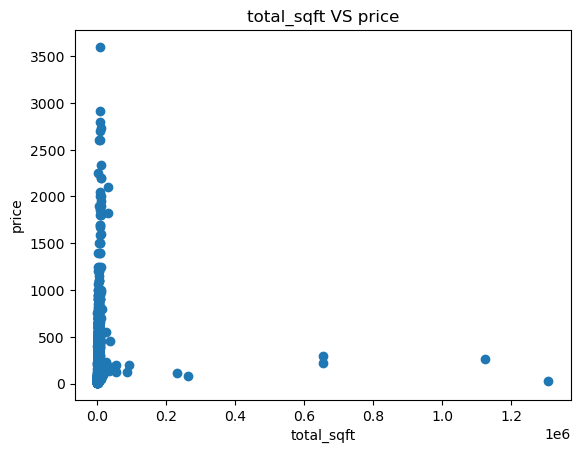

In [118]:
plt.scatter(df["total_sqft"], df["price"])
plt.title(f"total_sqft VS price")
plt.xlabel(f"total_sqft")
plt.ylabel("price")
plt.show()

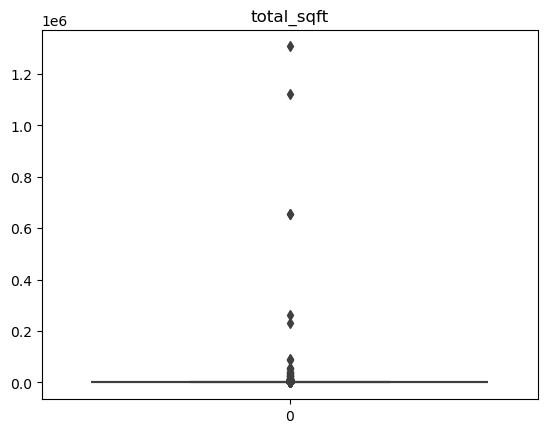

In [119]:
sns.boxplot(df["total_sqft"])
plt.title(f"total_sqft")
plt.show()

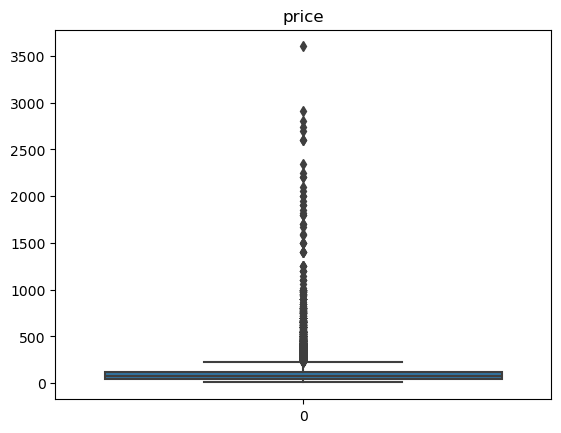

In [120]:
sns.boxplot(df["price"])
plt.title(f"price")
plt.show()

In [121]:
import numpy as np

def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    return outliers_removed


new_data=remove_outliers_iqr(df1["total_sqft"])
df1["new_total_sqft"]=new_data

In [122]:
import numpy as np

def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    return outliers_removed


new=remove_outliers_iqr(df1["price"])
df1["new_price"]=new

In [123]:
df1.isnull().sum()

area_type              0
availability           0
location               0
size                   0
total_sqft             0
bath                   0
balcony                0
price                  0
other_property         0
kitchen_and_hall       0
bedroom                0
total_rooms            0
new_total_sqft      1159
new_price           1212
dtype: int64

In [124]:
df1.dropna(subset=["new_total_sqft","new_price"],inplace=True)

In [125]:
df1.shape

(11097, 14)

In [126]:
x=df1.drop(["size","price","total_sqft","new_price"],axis=1)
y=df1["new_price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=80)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [127]:

def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=model.score(x_test,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(Linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(random)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(Ele)}')








These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 53.46358775010594
 For  Ridge Algorithm, we had an accuracy of 53.40113732215934
 For Lasso Regression Algorithm, we had an accuracy of 53.44693334715394
 For Decision TreeRegressor Algorithm, we had an accuracy of 24.505461114274784
 For Random Forest Regressor Algorithm, we had an accuracy of 57.913289693547476
 For Adaboost Forest Regressor Algorithm, we had an accuracy of 48.71025777876584
 For KNN Regressor Algorithm, we had an accuracy of 51.182775382832936
 For Elastic Net Algorithm, we had an accuracy of 50.26757152127823


In [128]:
def Evaluation(x_test, y_test, model) :
    prediction = model.predict(x_test)    
    mse = mean_absolute_error(y_test, prediction)
    msqe = mean_squared_error(y_test, prediction)
    r2 =r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print("Linear regression")
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2)
Evaluation(x_test,y_test,Linear)

Linear regression
mean_absolute_error :  20.130035979017386
mean_squared_error  :  792.6786637842443
root_mean_absolute_error 28.15454961075109
R2_score            :  0.5346358775010593


In [129]:
def Evaluation(x_test, y_test, model) :
    prediction = model.predict(x_test)    
    mse = mean_absolute_error(y_test, prediction)
    msqe = mean_squared_error(y_test, prediction)
    r2 =r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print("Lasso regression")
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2)
Evaluation(x_test,y_test,lasso)

Lasso regression
mean_absolute_error :  20.12291751683675
mean_squared_error  :  792.962346802334
root_mean_absolute_error 28.159587120594185
R2_score            :  0.5344693334715394


In [130]:
def Evaluation(x_test, y_test, model) :
    prediction = model.predict(x_test)    
    mse = mean_absolute_error(y_test, prediction)
    msqe = mean_squared_error(y_test, prediction)
    r2 =r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print("Random Forest regression")
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2)
Evaluation(x_test,y_test,random)

Random Forest regression
mean_absolute_error :  18.341349866564222
mean_squared_error  :  716.8846001631617
root_mean_absolute_error 26.77470074834006
R2_score            :  0.5791328969354748


In [131]:
def Evaluation(x_test, y_test, model) :
    prediction = model.predict(x_test)    
    mse = mean_absolute_error(y_test, prediction)
    msqe = mean_squared_error(y_test, prediction)
    r2 =r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print("Decision Tree regression")
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2)
Evaluation(x_test,y_test,tree)

Decision Tree regression
mean_absolute_error :  23.815539535931517
mean_squared_error  :  1285.9373405409128
root_mean_absolute_error 35.859968496094815
R2_score            :  0.24505461114274785


In [132]:
def Evaluation(x_test, y_test, model) :
    prediction = model.predict(x_test)    
    mse = mean_absolute_error(y_test, prediction)
    msqe = mean_squared_error(y_test, prediction)
    r2 =r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print("Linear regression")
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2)
Evaluation(x_test,y_test,ridge)

Linear regression
mean_absolute_error :  20.128934807169248
mean_squared_error  :  793.7424140688951
root_mean_absolute_error 28.173434545133027
R2_score            :  0.5340113732215934


In [133]:
def Evaluation(x_test, y_test, model) :
    prediction = model.predict(x_test)    
    mse = mean_absolute_error(y_test, prediction)
    msqe = mean_squared_error(y_test, prediction)
    r2 =r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print("KNN regression")
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2)
x=Evaluation(x_test,y_test,knn)


KNN regression
mean_absolute_error :  20.133886348276636
mean_squared_error  :  831.5289148505294
root_mean_absolute_error 28.836243077948442
R2_score            :  0.5118277538283293


In [134]:
scores = cross_val_score(random, x_train, y_train, cv=5) 
print("Mean Cross-Validation Score:", scores.mean())
print("Standard Deviation of Cross-Validation Scores:", scores.std())

Mean Cross-Validation Score: 0.5546081855692135
Standard Deviation of Cross-Validation Scores: 0.03252721717266552


In [135]:
x_test.shape

(8878, 10)

In [136]:
x=df1.drop(["size","price","total_sqft","new_price"],axis=1)
y=df1["new_price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=80)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [137]:
x_val=x_train[1000:]
y_val=y_train[1000:]

In [138]:
import tensorflow as tf
import keras
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import *

In [139]:

model = Sequential()
model.add(Dense(16, activation="relu", kernel_initializer="he_uniform", bias_initializer="zeros", input_dim=x_train.shape[1]))
#model.add(Dropout(0.3))
model.add(Dense(512, activation="relu", kernel_initializer="he_uniform", bias_initializer="ones"))  # Bias initializer corrected to "ones"
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))  
model.compile(optimizer="adam", loss="mean_squared_error") 

# Train the model
history = model.fit(x_train, y_train, epochs=500 ,batch_size=64, validation_data=(x_val, y_val))


Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7146.8457 - val_loss: 4108.6602
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3577.1533 - val_loss: 1738.8920
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1516.1539 - val_loss: 1165.7671
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1136.0121 - val_loss: 1049.6986
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1141.3297 - val_loss: 975.7601
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1008.7684 - val_loss: 927.7587
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1000.9303 - val_loss: 889.5649
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 922.7115 - val_loss: 859.6724
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 922.2122 - val_loss: 837.3347
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 902.9774 - val_loss: 821.0682
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 910.9473 - val_loss: 806.8747
Epoch 1

In [140]:
train_loss = history.history["loss"][-1]
train_loss


640.4052734375

In [141]:
y_pred=model.predict(x_test)

278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


In [142]:
from sklearn.metrics import r2_score

# Assuming y_true and y_pred are the true and predicted values, respectively
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.577347700681585


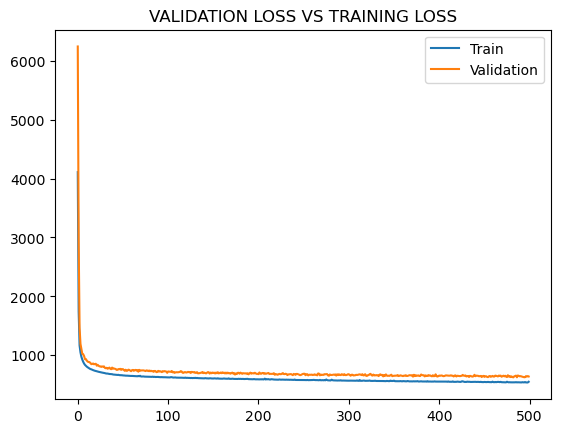

In [143]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.title("VALIDATION LOSS VS TRAINING LOSS")
plt.legend(["Train","Validation"],loc="upper right")

PCA

In [144]:
selected_features=random.feature_importances_
#selected_features
selected_features_df=pd.DataFrame(data=selected_features,columns=["Importance"],index=x.columns)
selected_features_df_sorted = selected_features_df.sort_values(by="Importance",ascending=True)
selected_features_df_sorted

,Importance
other_property,0.017186
kitchen_and_hall,0.017562
area_type,0.018522
total_rooms,0.022826
availability,0.025196
balcony,0.035828
bedroom,0.037321
location,0.158491
new_total_sqft,0.301177
bath,0.365892


In [145]:
selected_features_for_model_bilding=selected_features_df_sorted.tail(5).index.tolist()
selected_features_for_model_bilding

['balcony', 'bedroom', 'location', 'new_total_sqft', 'bath']

In [146]:
new_x=x[selected_features_for_model_bilding]
x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.7,random_state=60)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [147]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=model.score(x_test,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(Linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(random)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(Ele)}')

These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 47.553301852677755
 For  Ridge Algorithm, we had an accuracy of 47.55344696574993
 For Lasso Regression Algorithm, we had an accuracy of 47.598517594688616
 For Decision TreeRegressor Algorithm, we had an accuracy of 27.53915002712093
 For Random Forest Regressor Algorithm, we had an accuracy of 55.98893749237187
 For Adaboost Forest Regressor Algorithm, we had an accuracy of 26.15788940589081
 For KNN Regressor Algorithm, we had an accuracy of 51.96893764271561
 For Elastic Net Algorithm, we had an accuracy of 45.671124625270934


In [148]:
#Let's perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
ran=RandomizedSearchCV(estimator=random,param_distributions = {
    'n_estimators':[100,200,50,40,50],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the trees
    'min_samples_split':[100,200,50,40,50],  # Minimum number of samples required to split an internal node
    'min_samples_leaf':[100,200,50,40,50],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap':[True, False]},return_train_score=True)
ran.fit(x_train,y_train)
ass=ran.best_score_
ass

0.5622363011121511

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.6, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


def get_score(model):
    model.fit(X_train_pca,Y_train)
    pred=model.predict(X_test_pca)
    score=model.score(X_test_pca,Y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(Linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(random)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(Ele)}')

These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 39.598907878322706
 For  Ridge Algorithm, we had an accuracy of 39.59889255962615
 For Lasso Regression Algorithm, we had an accuracy of 39.59293861803622
 For Decision TreeRegressor Algorithm, we had an accuracy of 17.1124679646245
 For Random Forest Regressor Algorithm, we had an accuracy of 53.00899958039689
 For Adaboost Forest Regressor Algorithm, we had an accuracy of 41.65758251062967
 For KNN Regressor Algorithm, we had an accuracy of 48.03451424809839
 For Elastic Net Algorithm, we had an accuracy of 38.559500285154414


since the accuracy hardly increases upon all the methods used ,one other way 
is to add more data to the model in order to imporve the overall performance